In [954]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
reviews = pd.read_csv("Reviews.csv")
metadata = pd.read_csv("Metadata.csv")

In [3]:
reviews.shape

(278677, 10)

In [4]:
reviews.columns

# Object - undefined data type which cant be identified.

Index(['Unnamed: 0', 'reviewerID', 'asin', 'reviewerName', 'helpful',
       'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278677 entries, 0 to 278676
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      278677 non-null  int64 
 1   reviewerID      278677 non-null  object
 2   asin            278677 non-null  object
 3   reviewerName    278208 non-null  object
 4   helpful         278677 non-null  object
 5   reviewText      278653 non-null  object
 6   overall         278677 non-null  int64 
 7   summary         278676 non-null  object
 8   unixReviewTime  278677 non-null  int64 
 9   reviewTime      278677 non-null  object
dtypes: int64(3), object(7)
memory usage: 21.3+ MB


In [6]:

reviews.drop("Unnamed: 0", axis = 1 , inplace = True)
reviews.describe()

,overall,unixReviewTime
count,278677.000000,2.786770e+05
mean,4.245133,1.374197e+09
std,1.103747,2.904510e+07
min,1.000000,1.048896e+09
25%,4.000000,1.362787e+09
50%,5.000000,1.382141e+09
75%,5.000000,1.393200e+09
max,5.000000,1.406074e+09


In [7]:
len(reviews['asin'].unique())

23033

In [8]:
reviews.groupby('asin').count()

,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
asin,,,,,,,,
123456479,6,6,6,6,6,6,6,6
1608299953,13,13,13,13,13,13,13,13
1617160377,16,16,16,16,16,16,16,16
31887,23,23,23,23,23,23,23,23
B00001W0KA,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...
B00KA602SY,6,6,6,6,6,6,6,6
B00KCWMG5S,5,5,5,5,5,5,5,5
B00KF9180W,10,10,10,10,10,10,10,10


In [9]:
reviews_counts = reviews.groupby('asin')['reviewerID'].count().to_frame()
reviews_counts.describe()

,reviewerID
count,23033.000000
mean,12.099032
std,13.968255
min,5.000000
25%,6.000000
50%,8.000000
75%,13.000000
max,441.000000


array([[<AxesSubplot:title={'center':'reviewerID'}>]], dtype=object)

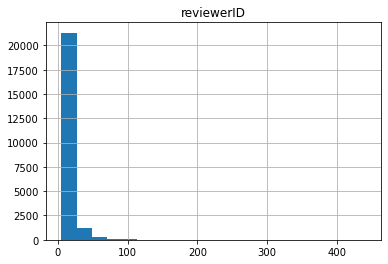

In [937]:
reviews_counts.hist('reviewerID',bins=20)

<AxesSubplot:>

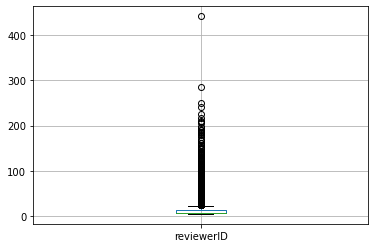

In [11]:
reviews_counts.boxplot()

# **Blacklist products based on review streak**

In [374]:
metadata = pd.read_csv("Metadata.csv")
len(metadata)


23033

In [375]:
category = []   #creating this to store data in data frame
gender = []   #creating this to store data in data frame
    
    # spliting and cleaning the category column
    
for i in range(len(metadata)):  #looping for entire population to clean and split data
    tags = metadata['categories'][i].replace("'Clothing, Shoes & Jewelry'",'')
    tags = tags.replace('[','').replace(']','').replace("'",'').replace('"','')
    tags = tags.replace(',','')
    tags = tags.strip().lower().split(" ")
    
    #Category
    if "shoes" in tags: category.append("shoes")
    elif "jewelry" in tags: category.append("jewelry")
    elif "clothing" in tags : category.append("clothing")
    else: category.append("others")
        
        
    # identifying the geneder based on the category text value
    
    #Gender
    male = ['men','boys']
    female = ['women','girls']
    if len(set.intersection(set(female),set(tags))) > 0 and len(set.intersection(set(male),set(tags))) > 0: gender.append("unisex")
    elif len(set.intersection(set(male),set(tags))) > 0 : gender.append("men")
    elif len(set.intersection(set(female),set(tags))) > 0 : gender.append("women")
    else: gender.append("unisex")
    #print(set(tags),"\n\n")
    #print("category",category)
    #print("gender",gender) 

In [376]:
metadata['Category_type'] = category
metadata['Gender'] = gender


In [292]:
metadata.head()

,metadataid,asin,salesrank,imurl,categories,title,related,Category_type,Gender,review_trend
0,2005401,B00004SR8Z,{'Clothing': 1631},http://ecx.images-amazon.com/images/I/41RfWLMD...,"[['Clothing, Shoes & Jewelry', 'Luggage & Trav...",Lewis N. Clark Deluxe Neck Stash,"{'also_bought': ['B004RJWFDU', 'B00920ZC3O', '...",others,unisex,51.84
1,2217897,B0000ZE74A,{'Clothing': 4742},http://ecx.images-amazon.com/images/I/41ryA-RO...,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",Vanity Fair Women's Lollipop Plus Size Cuff Le...,"{'also_bought': ['B004PEHJ6U', 'B0000TF5VK', '...",clothing,women,40.70
2,2220611,B00012O12A,{'Clothing': 4},http://ecx.images-amazon.com/images/I/41Dd7rCH...,"[['Clothing, Shoes & Jewelry', 'Men', 'Clothin...",Levi's Men's 505 Regular-Fit Jean,"{'also_bought': ['B0018OR118', 'B003M2X1VI', '...",clothing,men,48.67
3,2324985,B0002XSXWC,{'Clothing': 300},http://ecx.images-amazon.com/images/I/41-HS7D7...,"[['Sports & Outdoors', 'Clothing', 'Men', 'Shi...",Columbia Men's Bonehead Short Sleeve Fishing S...,"{'also_bought': ['B0031RFWMU', 'B0050VLSLO', '...",clothing,men,56.57
4,2348742,B00066TWMU,{'Clothing': 1199},http://ecx.images-amazon.com/images/I/51UNLUB4...,"[['Clothing, Shoes & Jewelry', 'ASICS'], ['Clo...",ASICS Mesh Backpack,"{'also_bought': ['B009DB3RS4', 'B001PFA35G', '...",others,unisex,32.81


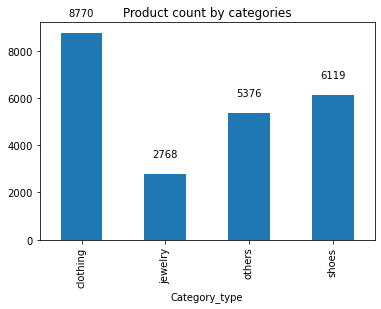

In [952]:
ax = metadata.groupby('Category_type')['metadataid'].count().plot.bar(title = "Product count by categories")
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 20), textcoords='offset points')

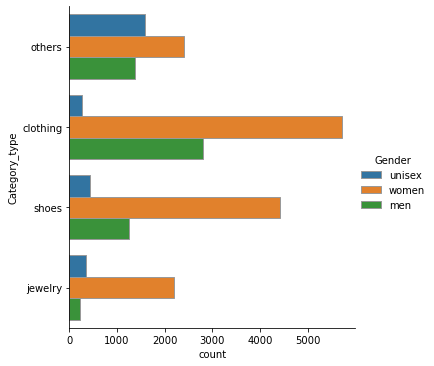

In [959]:
sns.catplot(y="Category_type", hue="Gender", kind="count", edgecolor=".6",data=metadata)

In [377]:
metadata

,metadataid,asin,salesrank,imurl,categories,title,description,price,related,brand,Category_type,Gender
0,2005401,B00004SR8Z,{'Clothing': 1631},http://ecx.images-amazon.com/images/I/41RfWLMD...,"[['Clothing, Shoes & Jewelry', 'Luggage & Trav...",Lewis N. Clark Deluxe Neck Stash,NaN,12.80,"{'also_bought': ['B004RJWFDU', 'B00920ZC3O', '...",Lewis N. Clark,others,unisex
1,2217897,B0000ZE74A,{'Clothing': 4742},http://ecx.images-amazon.com/images/I/41ryA-RO...,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",Vanity Fair Women's Lollipop Plus Size Cuff Le...,NaN,NaN,"{'also_bought': ['B004PEHJ6U', 'B0000TF5VK', '...",NaN,clothing,women
2,2220611,B00012O12A,{'Clothing': 4},http://ecx.images-amazon.com/images/I/41Dd7rCH...,"[['Clothing, Shoes & Jewelry', 'Men', 'Clothin...",Levi's Men's 505 Regular-Fit Jean,NaN,NaN,"{'also_bought': ['B0018OR118', 'B003M2X1VI', '...",NaN,clothing,men
3,2324985,B0002XSXWC,{'Clothing': 300},http://ecx.images-amazon.com/images/I/41-HS7D7...,"[['Sports & Outdoors', 'Clothing', 'Men', 'Shi...",Columbia Men's Bonehead Short Sleeve Fishing S...,NaN,NaN,"{'also_bought': ['B0031RFWMU', 'B0050VLSLO', '...",NaN,clothing,men
4,2348742,B00066TWMU,{'Clothing': 1199},http://ecx.images-amazon.com/images/I/51UNLUB4...,"[['Clothing, Shoes & Jewelry', 'ASICS'], ['Clo...",ASICS Mesh Backpack,NaN,12.41,"{'also_bought': ['B009DB3RS4', 'B001PFA35G', '...",ASICS,others,unisex
...,...,...,...,...,...,...,...,...,...,...,...,...
23028,9014582,B00GMFP3C2,{'Clothing': 8963},http://ecx.images-amazon.com/images/I/4146-7BI...,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",Vintage Retro Bikini Polka High Waist Short Bo...,NaN,NaN,"{'also_bought': ['B00J28IYTA', 'B00L22SJ4E', '...",NaN,clothing,women
23029,9055939,B00GUXA3E4,{'Clothing': 1237461},http://ecx.images-amazon.com/images/I/41LCQrVf...,"[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...",ShoSho Women's Plus Size Print &amp; Pattern L...,NaN,9.15,"{'also_bought': ['B00J3C20DG', 'B00HY2T5TO', '...",VANIUX,clothing,women
23030,9180895,B00HUZW7PY,{'Clothing': 13102},http://ecx.images-amazon.com/images/I/51kFbUjn...,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",Women'S Poly Span Various Print High &amp; Low...,NaN,19.95,"{'also_bought': ['B00IZMUT60', 'B00H4HU7A0', '...",NaN,clothing,women
23031,9202020,B00I07HQMU,{'Jewelry': 485},http://ecx.images-amazon.com/images/I/41OPXxBC...,"[['Clothing, Shoes & Jewelry', 'Novelty, Costu...",Keepsake Window Jewelry Box Organizer Storage ...,NaN,17.91,"{'also_bought': ['B001KKYN2U', 'B00570DVLS', '...",Furniture Creations,jewelry,unisex


In [16]:
from collections import Counter
import re
text = ' '.join(metadata['categories'][:])
text = re.sub(r'\b\w{1,2}\b', '', text).strip(" ")
text = text.replace("'Clothing, Shoes & Jewelry'",'')
text = text.replace('[','').replace(']','').replace("'",'').replace('"','')
text = text.replace(',','')
text = re.sub(' +',' ', text)
text = text.strip().lower().split(" ")
a = dict(Counter(text))
a

{'luggage': 996,
 '&': 30176,
 'travel': 1013,
 'gear': 776,
 'accessories': 4768,
 'wallets': 862,
 'women': 20194,
 'clothing': 10580,
 'lingerie': 1670,
 'sleep': 2166,
 'lounge': 2086,
 'intimates': 2077,
 'panties': 514,
 'briefs': 398,
 'plus-size': 841,
 'men': 8361,
 'jeans': 588,
 'big': 952,
 'tall': 947,
 'sports': 2138,
 'outdoors': 1704,
 'shirts': 1839,
 'button-down': 686,
 'columbia': 111,
 'asics': 199,
 'backpacks': 134,
 'shoes': 13534,
 'accessories:': 4803,
 'international': 6619,
 'shipping': 6626,
 'available': 6619,
 'winter': 273,
 'promo': 282,
 'minnetonka': 54,
 'boot': 914,
 'shop': 974,
 'fashion': 1895,
 'shearling': 92,
 'boots': 1387,
 'rainbow': 9,
 'sandals': 1444,
 'street': 555,
 'surf': 508,
 'skate': 508,
 'dress': 308,
 'novelty': 10139,
 'costumes': 7436,
 'more': 6640,
 'band': 494,
 'music': 494,
 'fan': 580,
 'loafers': 453,
 'slip-ons': 436,
 'acorn': 37,
 'caterpillar': 14,
 'outdoor': 712,
 'work': 1282,
 'safety': 219,
 'wear': 730,
 'uni

In [17]:
df = pd.DataFrame.from_dict(a, orient='index').reset_index()


df['index'] = df['index'].str.strip(',')
df = df.loc[(df['index'].str.len()>1)]
df

,index,0
0,luggage,996
2,travel,1013
3,gear,776
4,accessories,4768
5,wallets,862
...,...,...
1177,blvd,1
1178,connection,1
1179,skirt,1
1180,coach,1


In [993]:
# sort the values 

df.sort_values(by = 0, ascending = False)

KeyError: 0

<AxesSubplot:>

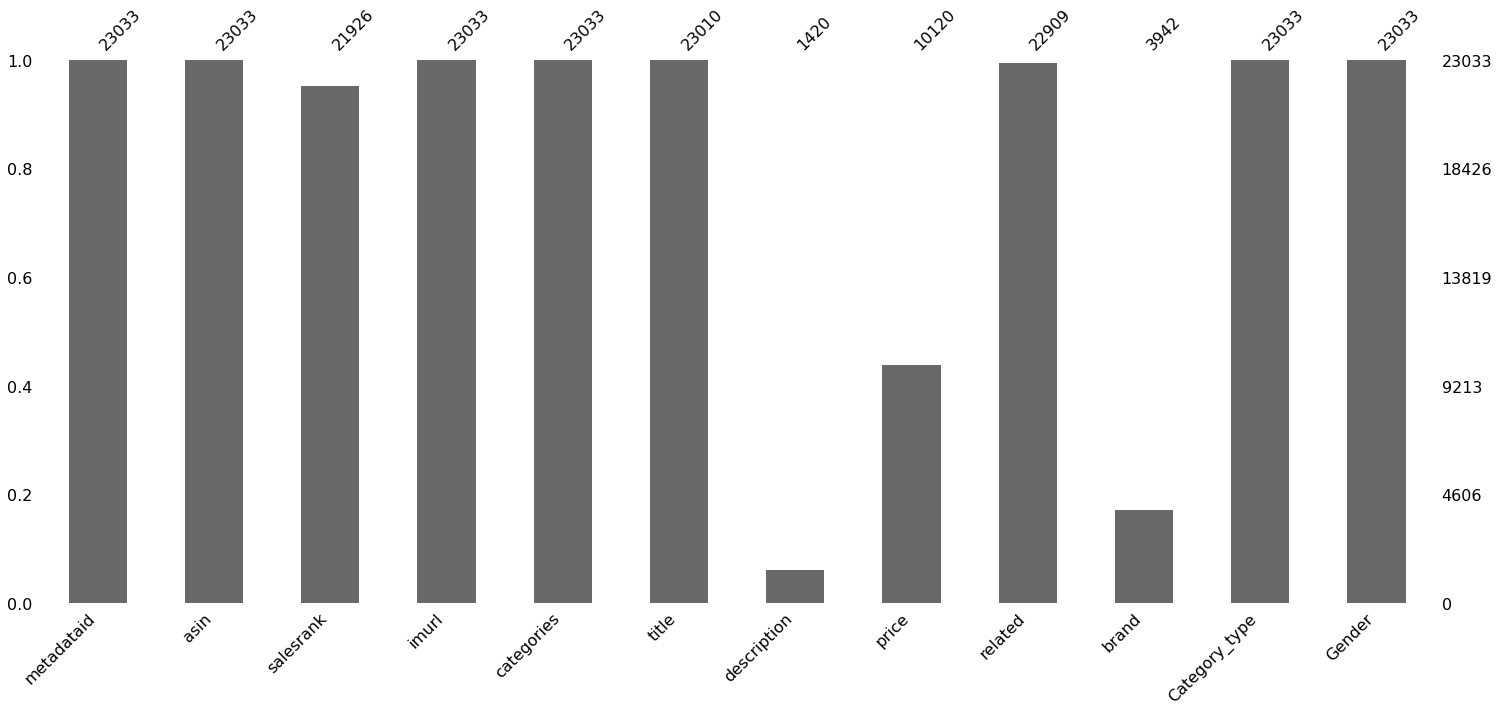

In [378]:
import missingno as msno
msno.bar(metadata)

In [379]:
metadata.drop(['description','price','brand'], axis = 1, inplace = True)

<AxesSubplot:>

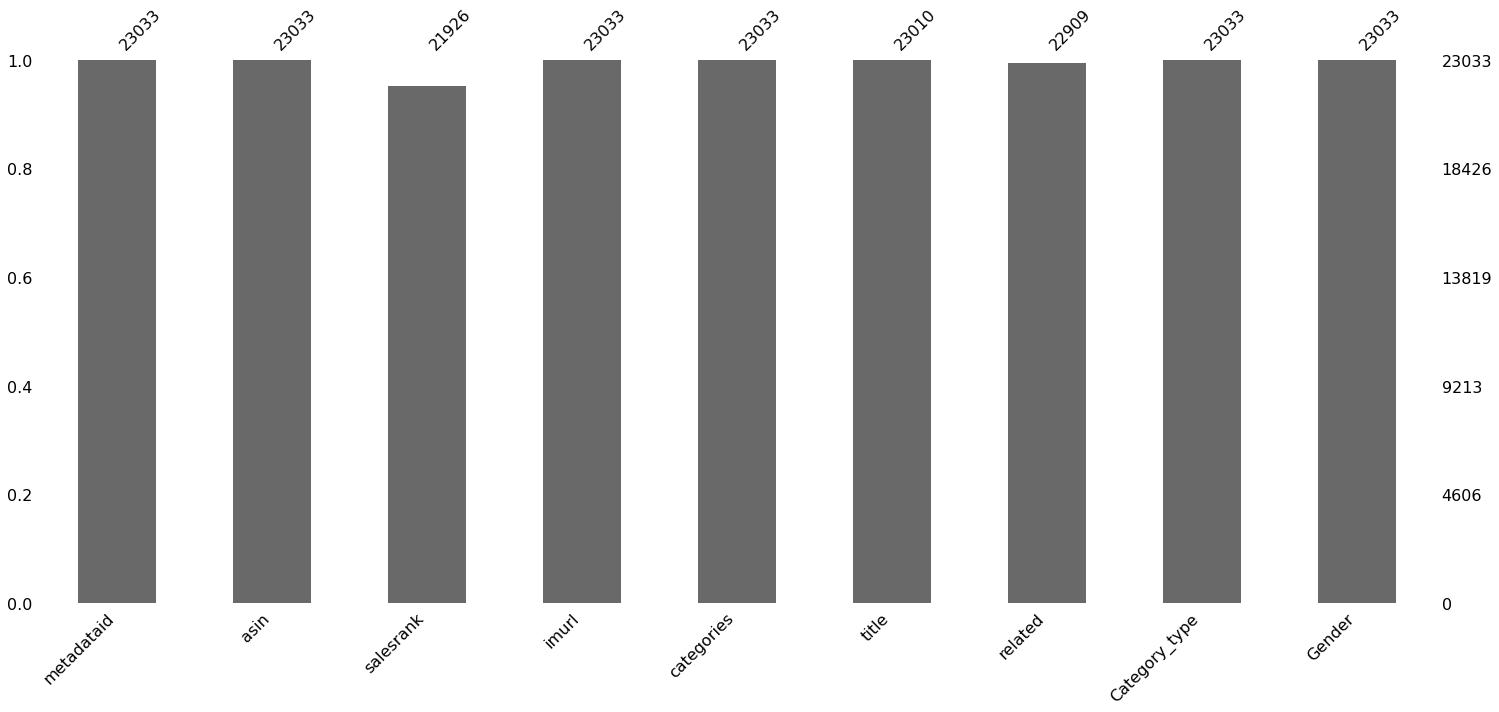

In [380]:
msno.bar(metadata)

<AxesSubplot:>

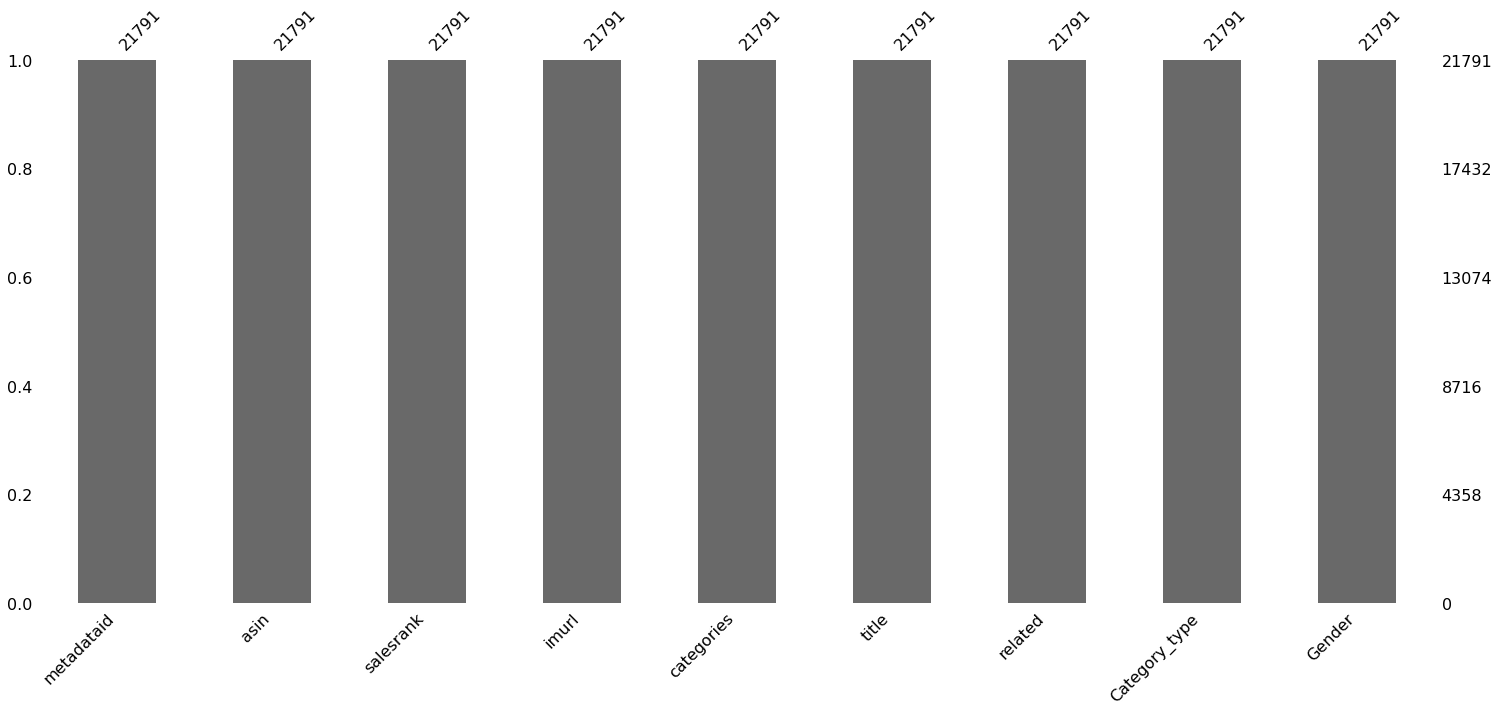

In [22]:

#metadata.dropna(inplace = True)
#msno.bar(metadata)

<AxesSubplot:>

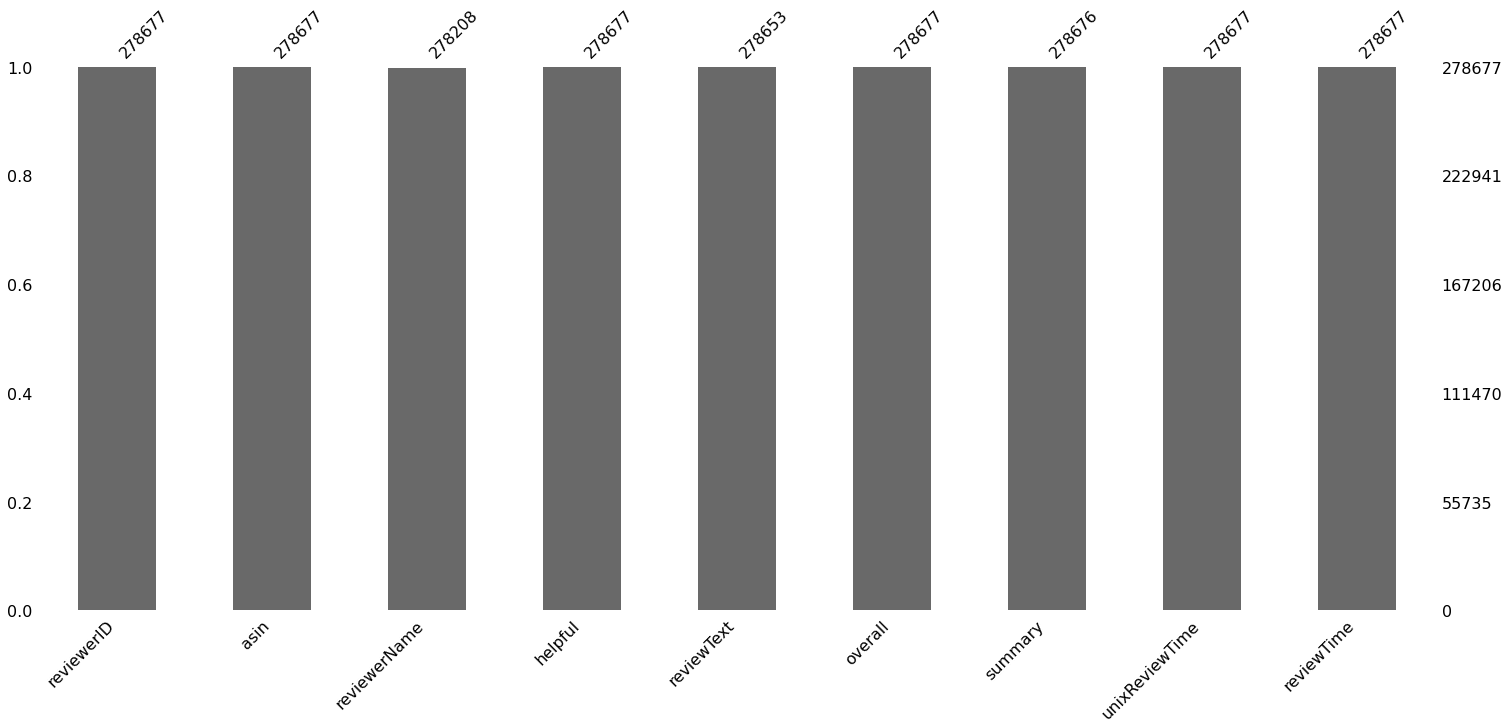

In [23]:
msno.bar(reviews)

In [24]:
reviews[reviews['reviewerName'].isna()]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
2866,A3UX3UDVQ9OHLI,B0000UZ5P0,NaN,"[0, 0]",Have used this sterling silver polishing cloth...,5,Connoisseurs is the best for removing dark tar...,1405382400,"07 15, 2014"
5272,A9NJQ4KOTWI4V,B00022JPNE,NaN,"[0, 0]",I wear a size 34 waist and based on the manufa...,4,nice but tight,1405468800,"07 16, 2014"
5321,A1O0GKFCQ0OP9I,B00023JMYU,NaN,"[0, 0]",start chanfin colors after one wear,1,One Star,1405814400,"07 20, 2014"
7804,ACH16TO26X7B8,B00062NHGQ,NaN,"[0, 0]","Nice product,worth the price",5,Five Stars,1405209600,"07 13, 2014"
10004,A2DDNJEHD4VRJF,B00075ZYRW,NaN,"[0, 0]",A basic shirt which is pretty durable...for th...,5,Great workout t-shirt,1356825600,"12 30, 2012"
...,...,...,...,...,...,...,...,...,...
273052,A34OKS1R1UCFQY,B00F9RNVM8,NaN,"[3, 3]","Great leggings, very comfy, very warm and the ...",4,Warm Leggings,1389830400,"01 16, 2014"
277068,A2DNMHBMMK54L7,B00HJ2T9PO,NaN,"[0, 0]",For the prince it's a cute little necklace to ...,4,Cheap Fashion Jewelry,1392681600,"02 18, 2014"
277069,A235U2JO4CPJEW,B00HJ2T9PO,NaN,"[0, 0]",I got this for my granddaughter for Valentines...,4,Cute Necklace,1392940800,"02 21, 2014"
277070,AG3XGE2M498IK,B00HJ2T9PO,NaN,"[0, 0]","It's cute, I really like it. It is definitely ...",4,Cute but?,1393372800,"02 26, 2014"


#### Sentiment Analysis

In [49]:
#Identifying the sentiment of the review

#reviews['sentiment'] = reviews['reviewText'].apply(lambda x: flair_prediction(x) if len(x)>0, else "Neutral")

In [ ]:
#Creating dummy variables for Positive, negative and neutral categories



In [ ]:
# concatenating the dummy variables with the main 

### checking if reviewer name is present in all the rows for the product reviewed or not ... looks like some reviwer has given names for certain reviews but not for all so that column looks fine

##### Reviewer ranking based on rating 

In [25]:
len(reviews['reviewerID'].unique())

39387

### one use how many comments has posted ?

In [26]:
from datetime import datetime
Datetime = reviews['unixReviewTime'][0]
Datetime 
dt_object = datetime.fromtimestamp(Datetime).date()
print(dt_object)


2013-01-19


In [27]:
reviews['Converted_Date'] = reviews['unixReviewTime'].apply(lambda x:datetime.fromtimestamp(x).date())
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Converted_Date
0,A2G5TCU2WDFZ65,31887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",2013-01-19
1,A2Q6UWR5PBHTJS,31887,"Sylvia ""Sylvia""","[0, 0]","Our granddaughters are all very girlie, so whe...",5,Sassy!,1358553600,"01 19, 2013",2013-01-19
2,AX1QE6IR7CHXM,31887,JJ,"[0, 0]","Wonder my niece wears it every single day, yel...",5,Wonderful and great shipping.,1388620800,"01 2, 2014",2014-01-02
3,A1JR9KKF6UKUWW,31887,Queens Meadow,"[0, 0]",Bought this for my niece as part of her fairy ...,5,must have for a fairy princess,1359504000,"01 30, 2013",2013-01-30
4,A2A2WZYLU528RO,31887,Julie Gayler,"[0, 0]",My daughter has worn this skirt almost every d...,5,Excellent quality!,1391040000,"01 30, 2014",2014-01-30


In [165]:
x = '[1,3]'
#x.replace(']','').split(',')[1]
len(x)

5

In [171]:
reviews['UpVote'] =reviews['helpful'].apply(lambda x:int(x.replace('[','').split(',')[0]) ) #getting upvotes

reviews['DownVote'] =reviews['helpful'].apply(lambda x:int(x.replace(']','').split(',')[1])) #getting downvotes  


reviews['Review_len'] =reviews['reviewText'].apply(lambda x: len(str(x)) ) #len of the review text

reviews['summary_len'] =reviews['summary'].apply(lambda x: len(str(x)) ) #len of the summary text

# int(text.replace('[','').split(',')[0])     --- this is use for the splitting the helpful value 
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Converted_Date,UpVote,DownVote,Review_len,summary_len
0,A2G5TCU2WDFZ65,31887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",2013-01-19,0,0,306,11
1,A2Q6UWR5PBHTJS,31887,"Sylvia ""Sylvia""","[0, 0]","Our granddaughters are all very girlie, so whe...",5,Sassy!,1358553600,"01 19, 2013",2013-01-19,0,0,233,6
2,AX1QE6IR7CHXM,31887,JJ,"[0, 0]","Wonder my niece wears it every single day, yel...",5,Wonderful and great shipping.,1388620800,"01 2, 2014",2014-01-02,0,0,180,29
3,A1JR9KKF6UKUWW,31887,Queens Meadow,"[0, 0]",Bought this for my niece as part of her fairy ...,5,must have for a fairy princess,1359504000,"01 30, 2013",2013-01-30,0,0,120,30
4,A2A2WZYLU528RO,31887,Julie Gayler,"[0, 0]",My daughter has worn this skirt almost every d...,5,Excellent quality!,1391040000,"01 30, 2014",2014-01-30,0,0,360,18


In [172]:
reviews['DownVote'] = reviews['DownVote'] - reviews['UpVote']  # Calculating downvotes
reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Converted_Date,UpVote,DownVote,Review_len,summary_len
0,A2G5TCU2WDFZ65,31887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",2013-01-19,0,0,306,11
1,A2Q6UWR5PBHTJS,31887,"Sylvia ""Sylvia""","[0, 0]","Our granddaughters are all very girlie, so whe...",5,Sassy!,1358553600,"01 19, 2013",2013-01-19,0,0,233,6
2,AX1QE6IR7CHXM,31887,JJ,"[0, 0]","Wonder my niece wears it every single day, yel...",5,Wonderful and great shipping.,1388620800,"01 2, 2014",2014-01-02,0,0,180,29
3,A1JR9KKF6UKUWW,31887,Queens Meadow,"[0, 0]",Bought this for my niece as part of her fairy ...,5,must have for a fairy princess,1359504000,"01 30, 2013",2013-01-30,0,0,120,30
4,A2A2WZYLU528RO,31887,Julie Gayler,"[0, 0]",My daughter has worn this skirt almost every d...,5,Excellent quality!,1391040000,"01 30, 2014",2014-01-30,0,0,360,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278672,A2DG63DN704LOI,B00KKXCJQU,ESlayd,"[0, 1]",I don't normally go ga-ga over a product very ...,5,These have literally changed the way I travel!,1403568000,"06 24, 2014",2014-06-24,0,1,1315,46
278673,A1EVV74UQYVKRY,B00KKXCJQU,K. Groh,"[0, 0]",I've been traveling back and forth to England ...,5,Wonderful for Better Packing,1403740800,"06 26, 2014",2014-06-26,0,0,827,28
278674,A1UQBFCERIP7VJ,B00KKXCJQU,Margaret Picky,"[1, 1]",These are very nice packing cubes and the 18 x...,5,"Convenient, lightweight, and durable",1402185600,"06 8, 2014",2014-06-08,1,0,914,36
278675,A22CW0ZHY3NJH8,B00KKXCJQU,Noname,"[2, 2]",I am on vacation with my family of four and th...,5,Holds Up Well In Real World Test,1404691200,"07 7, 2014",2014-07-07,2,0,1126,32


In [29]:
review_count = reviews.groupby(['reviewerID']).count()['asin'].to_frame().sort_values(by ='asin', ascending = False)
review_count.rename(columns = {'asin':'Number_Of_Reviews_Per_Reviewer_ID'}, inplace = True)

review_count

,Number_Of_Reviews_Per_Reviewer_ID
reviewerID,
A2J4XMWKR8PPD0,136
A2GA55P7WGHJCP,76
A2KBV88FL48CFS,69
AENH50GW3OKDA,68
A2V5R832QCSOMX,62
...,...
A3BLUP4H13EZO1,5
A3BKZSNJL42ND3,5
A3BKYK19JP3WT5,5


<AxesSubplot:>

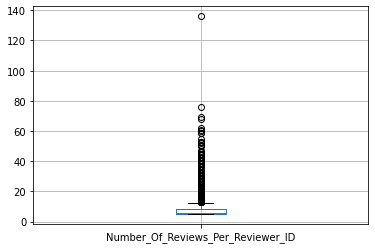

In [30]:
review_count.boxplot()

# find the outlier- to check for that most commented person if the reviews are over the years or within a particular or how its spread
# to find it the most commented reviwer is VALID or FAKE   -- detected the outlier that is on the top


In [31]:
review_count['Number_Of_Reviews_Per_Reviewer_ID'].describe()

#to show the percentile on the above box plot   -- total reviews 39387!! 


count    39387.000000
mean         7.075355
std          3.585250
min          5.000000
25%          5.000000
50%          6.000000
75%          8.000000
max        136.000000
Name: Number_Of_Reviews_Per_Reviewer_ID, dtype: float64

In [1008]:
review_count['Number_Of_Reviews_Per_Reviewer_ID'].quantile(0.9)

10.0

In [32]:
#IQR 
# why are we using this ? - to find if a data is skewed or not 

IQR  = review_count['Number_Of_Reviews_Per_Reviewer_ID'].quantile(0.75) - review_count['Number_Of_Reviews_Per_Reviewer_ID'].quantile(0.25)
IQR 

LB = review_count['Number_Of_Reviews_Per_Reviewer_ID'].quantile(0.25) - (1.5 * IQR)
print(LB)

UB = review_count['Number_Of_Reviews_Per_Reviewer_ID'].quantile(0.75) + (1.5 * IQR)
print(UB)



0.5
12.5


In [33]:
# creating column for outlier

review_count['outlier'] = review_count['Number_Of_Reviews_Per_Reviewer_ID'].apply(lambda x: 1 if (x>UB) else 0 )  
review_count.reset_index(inplace = True)
review_count



,reviewerID,Number_Of_Reviews_Per_Reviewer_ID,outlier
0,A2J4XMWKR8PPD0,136,1
1,A2GA55P7WGHJCP,76,1
2,A2KBV88FL48CFS,69,1
3,AENH50GW3OKDA,68,1
4,A2V5R832QCSOMX,62,1
...,...,...,...
39382,A3BLUP4H13EZO1,5,0
39383,A3BKZSNJL42ND3,5,0
39384,A3BKYK19JP3WT5,5,0
39385,A3BKNXX8QFIXIV,5,0


In [34]:
# reviwers mean rating in whole population

reviewer_ratings = reviews.groupby(['reviewerID'])['overall'].mean().to_frame().reset_index()
reviewer_ratings

,reviewerID,overall
0,A001114613O3F18Q5NVR6,4.857143
1,A00146182PNM90WNNAZ5Q,4.000000
2,A00165422B2GAUE3EL6Z0,4.333333
3,A00338282E99B8OR2JYTZ,4.600000
4,A00354001GE099Q1FL0TU,4.400000
...,...,...
39382,AZZMQ85DPFEG3,2.909091
39383,AZZNK89PXD006,3.800000
39384,AZZT1ERHBSNQ8,4.500000
39385,AZZTOUKVTUMVM,3.500000


In [35]:
review_products = reviews.groupby(['reviewerID'])['asin'].count().to_frame().reset_index()
review_products

,reviewerID,asin
0,A001114613O3F18Q5NVR6,7
1,A00146182PNM90WNNAZ5Q,7
2,A00165422B2GAUE3EL6Z0,6
3,A00338282E99B8OR2JYTZ,5
4,A00354001GE099Q1FL0TU,5
...,...,...
39382,AZZMQ85DPFEG3,11
39383,AZZNK89PXD006,5
39384,AZZT1ERHBSNQ8,10
39385,AZZTOUKVTUMVM,6


In [37]:
 pd.merge(review_count, reviewer_ratings, on='reviewerID')

,reviewerID,Number_Of_Reviews_Per_Reviewer_ID,outlier,overall
0,A2J4XMWKR8PPD0,136,1,5.000000
1,A2GA55P7WGHJCP,76,1,3.934211
2,A2KBV88FL48CFS,69,1,4.695652
3,AENH50GW3OKDA,68,1,4.573529
4,A2V5R832QCSOMX,62,1,4.306452
...,...,...,...,...
39382,A3BLUP4H13EZO1,5,0,3.600000
39383,A3BKZSNJL42ND3,5,0,4.400000
39384,A3BKYK19JP3WT5,5,0,4.400000
39385,A3BKNXX8QFIXIV,5,0,4.600000


In [91]:
reviewer_df = pd.merge( pd.merge(review_count, reviewer_ratings, on='reviewerID'), review_products, on = 'reviewerID')
reviewer_df.rename(columns = {'overall':'Average_rating','asin':'no_products_reviewed_by_reviewer'}, inplace = True)
reviewer_df

,reviewerID,Number_Of_Reviews_Per_Reviewer_ID,outlier,Average_rating,no_products_reviewed_by_reviewer
0,A2J4XMWKR8PPD0,136,1,5.000000,136
1,A2GA55P7WGHJCP,76,1,3.934211,76
2,A2KBV88FL48CFS,69,1,4.695652,69
3,AENH50GW3OKDA,68,1,4.573529,68
4,A2V5R832QCSOMX,62,1,4.306452,62
...,...,...,...,...,...
39382,A3BLUP4H13EZO1,5,0,3.600000,5
39383,A3BKZSNJL42ND3,5,0,4.400000,5
39384,A3BKYK19JP3WT5,5,0,4.400000,5
39385,A3BKNXX8QFIXIV,5,0,4.600000,5


In [92]:
# checking if more than 1 review per product is done by reviewer

(reviewer_df['Number_Of_Reviews_Per_Reviewer_ID'] - reviewer_df['no_products_reviewed_by_reviewer']).sum()



0

In [94]:
# already dropped below column once ! 

reviewer_df.drop('no_products_reviewed_by_reviewer', axis = 1, inplace = True)
reviewer_df

,reviewerID,Number_Of_Reviews_Per_Reviewer_ID,outlier,Average_rating
0,A2J4XMWKR8PPD0,136,1,5.000000
1,A2GA55P7WGHJCP,76,1,3.934211
2,A2KBV88FL48CFS,69,1,4.695652
3,AENH50GW3OKDA,68,1,4.573529
4,A2V5R832QCSOMX,62,1,4.306452
...,...,...,...,...
39382,A3BLUP4H13EZO1,5,0,3.600000
39383,A3BKZSNJL42ND3,5,0,4.400000
39384,A3BKYK19JP3WT5,5,0,4.400000
39385,A3BKNXX8QFIXIV,5,0,4.600000


In [95]:
# How many helpful upvotes for each reviewer ID ... so that we can try to find a ration ..
# or try to see if the reviewer is genuine

review_helpful = reviews.groupby(['reviewerID'])['UpVote'].sum().to_frame().reset_index()
review_helpful

,reviewerID,UpVote
0,A001114613O3F18Q5NVR6,11
1,A00146182PNM90WNNAZ5Q,9
2,A00165422B2GAUE3EL6Z0,0
3,A00338282E99B8OR2JYTZ,0
4,A00354001GE099Q1FL0TU,0
...,...,...
39382,AZZMQ85DPFEG3,5
39383,AZZNK89PXD006,2
39384,AZZT1ERHBSNQ8,0
39385,AZZTOUKVTUMVM,3


In [96]:
reviewer_df = pd.merge(reviewer_df, review_helpful, on ='reviewerID')
reviewer_df

,reviewerID,Number_Of_Reviews_Per_Reviewer_ID,outlier,Average_rating,UpVote
0,A2J4XMWKR8PPD0,136,1,5.000000,97
1,A2GA55P7WGHJCP,76,1,3.934211,229
2,A2KBV88FL48CFS,69,1,4.695652,322
3,AENH50GW3OKDA,68,1,4.573529,107
4,A2V5R832QCSOMX,62,1,4.306452,289
...,...,...,...,...,...
39382,A3BLUP4H13EZO1,5,0,3.600000,15
39383,A3BKZSNJL42ND3,5,0,4.400000,15
39384,A3BKYK19JP3WT5,5,0,4.400000,1
39385,A3BKNXX8QFIXIV,5,0,4.600000,6


In [98]:
#introduce a metric for thre reviewer rank 
reviewer_df[reviewer_df['UpVote'] > 0 ].sort_values( by = 'UpVote' , ascending = False)
#reviewer_df


,reviewerID,Number_Of_Reviews_Per_Reviewer_ID,outlier,Average_rating,UpVote
1344,A1DDZAE5NREK1O,15,1,4.400000,1206
17,A2R6RA8FRBS608,50,1,4.860000,1042
3805,A2GGKJ318HO2GE,11,0,4.727273,959
12489,A2REQUI85URT87,7,0,4.571429,794
28,AWBGHDHH7E51F,45,1,4.288889,739
...,...,...,...,...,...
32118,A1YAFLWD0UFXY,5,0,5.000000,1
18506,A1GLNGS5QLB2VU,6,0,4.333333,1
25748,A1G3T7SPFQUYW4,5,0,3.600000,1
32108,A2XYF6IPBY27EN,5,0,3.800000,1


In [116]:
import math 
reviewer_df['reviewer_quality'] = reviewer_df['UpVote'] / reviewer_df['Number_Of_Reviews_Per_Reviewer_ID'] 
reviewer_df = reviewer_df.sort_values( by = 'reviewer_quality' , ascending = False)
reviewer_df


,reviewerID,Number_Of_Reviews_Per_Reviewer_ID,outlier,Average_rating,UpVote,reviewer_quality
12489,A2REQUI85URT87,7,0,4.571429,794,113.428571
11587,A30NHVVC62LJMK,7,0,4.000000,691,98.714286
35952,A1JC0IMMPR08T9,5,0,3.800000,457,91.400000
19923,A1DORQXHAAR8J9,6,0,4.000000,541,90.166667
3805,A2GGKJ318HO2GE,11,0,4.727273,959,87.181818
...,...,...,...,...,...,...
12767,A2NHMZGLAMMCFX,7,0,4.142857,0,0.000000
29161,A1AN56ILBIGZPU,5,0,3.800000,0,0.000000
29162,AQ3V3H6X4EAAD,5,0,5.000000,0,0.000000
29165,A15135NDLF7ZBW,5,0,4.000000,0,0.000000


In [119]:
reviewer_df['reviewer_quality'] = reviewer_df['reviewer_quality'].apply(lambda x: math.ceil(x) )
reviewer_df

,reviewerID,Number_Of_Reviews_Per_Reviewer_ID,outlier,Average_rating,UpVote,reviewer_quality
12489,A2REQUI85URT87,7,0,4.571429,794,114
11587,A30NHVVC62LJMK,7,0,4.000000,691,99
35952,A1JC0IMMPR08T9,5,0,3.800000,457,92
19923,A1DORQXHAAR8J9,6,0,4.000000,541,91
3805,A2GGKJ318HO2GE,11,0,4.727273,959,88
...,...,...,...,...,...,...
12767,A2NHMZGLAMMCFX,7,0,4.142857,0,0
29161,A1AN56ILBIGZPU,5,0,3.800000,0,0
29162,AQ3V3H6X4EAAD,5,0,5.000000,0,0
29165,A15135NDLF7ZBW,5,0,4.000000,0,0


In [174]:
review_len = reviews.groupby(['reviewerID'])['Review_len'].mean().to_frame().reset_index()
review_len

,reviewerID,Review_len
0,A001114613O3F18Q5NVR6,278.285714
1,A00146182PNM90WNNAZ5Q,176.142857
2,A00165422B2GAUE3EL6Z0,121.333333
3,A00338282E99B8OR2JYTZ,201.600000
4,A00354001GE099Q1FL0TU,146.000000
...,...,...
39382,AZZMQ85DPFEG3,153.000000
39383,AZZNK89PXD006,886.000000
39384,AZZT1ERHBSNQ8,58.300000
39385,AZZTOUKVTUMVM,319.000000


In [175]:
review_len['Review_len']=review_len['Review_len'].apply(lambda x: math.ceil(x))
review_len

,reviewerID,Review_len
0,A001114613O3F18Q5NVR6,279
1,A00146182PNM90WNNAZ5Q,177
2,A00165422B2GAUE3EL6Z0,122
3,A00338282E99B8OR2JYTZ,202
4,A00354001GE099Q1FL0TU,146
...,...,...
39382,AZZMQ85DPFEG3,153
39383,AZZNK89PXD006,886
39384,AZZT1ERHBSNQ8,59
39385,AZZTOUKVTUMVM,319


In [176]:
reviewer_df = pd.merge(review_len, reviewer_df, on ='reviewerID')
reviewer_df

,reviewerID,Review_len,Number_Of_Reviews_Per_Reviewer_ID,outlier,Average_rating,UpVote,reviewer_quality
0,A001114613O3F18Q5NVR6,279,7,0,4.857143,11,2
1,A00146182PNM90WNNAZ5Q,177,7,0,4.000000,9,2
2,A00165422B2GAUE3EL6Z0,122,6,0,4.333333,0,0
3,A00338282E99B8OR2JYTZ,202,5,0,4.600000,0,0
4,A00354001GE099Q1FL0TU,146,5,0,4.400000,0,0
...,...,...,...,...,...,...,...
39382,AZZMQ85DPFEG3,153,11,0,2.909091,5,1
39383,AZZNK89PXD006,886,5,0,3.800000,2,1
39384,AZZT1ERHBSNQ8,59,10,0,4.500000,0,0
39385,AZZTOUKVTUMVM,319,6,0,3.500000,3,1


In [181]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Converted_Date,UpVote,DownVote,Review_len,summary_len
0,A2G5TCU2WDFZ65,31887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",2013-01-19,0,0,306,11
1,A2Q6UWR5PBHTJS,31887,"Sylvia ""Sylvia""","[0, 0]","Our granddaughters are all very girlie, so whe...",5,Sassy!,1358553600,"01 19, 2013",2013-01-19,0,0,233,6
2,AX1QE6IR7CHXM,31887,JJ,"[0, 0]","Wonder my niece wears it every single day, yel...",5,Wonderful and great shipping.,1388620800,"01 2, 2014",2014-01-02,0,0,180,29
3,A1JR9KKF6UKUWW,31887,Queens Meadow,"[0, 0]",Bought this for my niece as part of her fairy ...,5,must have for a fairy princess,1359504000,"01 30, 2013",2013-01-30,0,0,120,30
4,A2A2WZYLU528RO,31887,Julie Gayler,"[0, 0]",My daughter has worn this skirt almost every d...,5,Excellent quality!,1391040000,"01 30, 2014",2014-01-30,0,0,360,18


In [178]:
#Aggregating downvotes

review_downvote = reviews.groupby(['reviewerID'])['DownVote'].sum().to_frame().reset_index()
review_downvote

,reviewerID,DownVote
0,A001114613O3F18Q5NVR6,2
1,A00146182PNM90WNNAZ5Q,4
2,A00165422B2GAUE3EL6Z0,1
3,A00338282E99B8OR2JYTZ,0
4,A00354001GE099Q1FL0TU,0
...,...,...
39382,AZZMQ85DPFEG3,3
39383,AZZNK89PXD006,0
39384,AZZT1ERHBSNQ8,0
39385,AZZTOUKVTUMVM,2


In [179]:
#Merging downvotes with entire table

reviewer_df = pd.merge(review_downvote, reviewer_df, on ='reviewerID')


,reviewerID,DownVote,Review_len,Number_Of_Reviews_Per_Reviewer_ID,outlier,Average_rating,UpVote,reviewer_quality
0,A001114613O3F18Q5NVR6,2,279,7,0,4.857143,11,2
1,A00146182PNM90WNNAZ5Q,4,177,7,0,4.000000,9,2
2,A00165422B2GAUE3EL6Z0,1,122,6,0,4.333333,0,0
3,A00338282E99B8OR2JYTZ,0,202,5,0,4.600000,0,0
4,A00354001GE099Q1FL0TU,0,146,5,0,4.400000,0,0
...,...,...,...,...,...,...,...,...
39382,AZZMQ85DPFEG3,3,153,11,0,2.909091,5,1
39383,AZZNK89PXD006,0,886,5,0,3.800000,2,1
39384,AZZT1ERHBSNQ8,0,59,10,0,4.500000,0,0
39385,AZZTOUKVTUMVM,2,319,6,0,3.500000,3,1


In [183]:
#Renaming outlier

reviewer_df.rename(columns={'outlier':'review_counts_outlier'}, inplace =True)
reviewer_df

,reviewerID,DownVote,Review_len,Number_Of_Reviews_Per_Reviewer_ID,review_counts_outlier,Average_rating,UpVote,reviewer_quality
0,A001114613O3F18Q5NVR6,2,279,7,0,4.857143,11,2
1,A00146182PNM90WNNAZ5Q,4,177,7,0,4.000000,9,2
2,A00165422B2GAUE3EL6Z0,1,122,6,0,4.333333,0,0
3,A00338282E99B8OR2JYTZ,0,202,5,0,4.600000,0,0
4,A00354001GE099Q1FL0TU,0,146,5,0,4.400000,0,0
...,...,...,...,...,...,...,...,...
39382,AZZMQ85DPFEG3,3,153,11,0,2.909091,5,1
39383,AZZNK89PXD006,0,886,5,0,3.800000,2,1
39384,AZZT1ERHBSNQ8,0,59,10,0,4.500000,0,0
39385,AZZTOUKVTUMVM,2,319,6,0,3.500000,3,1


In [206]:
#to what percent of people -- the reviewers are influencers... 
#reviewer quality column is basically number of upvotes per review

reviews.describe()


/Users/jeyasriramesh/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,overall,unixReviewTime,UpVote,DownVote,Review_len,summary_len,Votes_ratio
count,278677.000000,2.786770e+05,278677.000000,278677.000000,278677.000000,278677.000000,87021.0
mean,4.245133,1.374197e+09,1.145936,0.198664,315.240881,20.284641,inf
std,1.103747,2.904510e+07,6.579834,1.041042,330.698977,13.948638,NaN
min,1.000000,1.048896e+09,0.000000,-2.000000,2.000000,1.000000,-2.0
25%,4.000000,1.362787e+09,0.000000,0.000000,139.000000,11.000000,2.0
50%,5.000000,1.382141e+09,0.000000,0.000000,213.000000,17.000000,NaN
75%,5.000000,1.393200e+09,1.000000,0.000000,366.000000,26.000000,NaN
max,5.000000,1.406074e+09,1200.000000,248.000000,22646.000000,201.000000,inf


array([[<AxesSubplot:title={'center':'UpVote'}>,
        <AxesSubplot:title={'center':'DownVote'}>]], dtype=object)

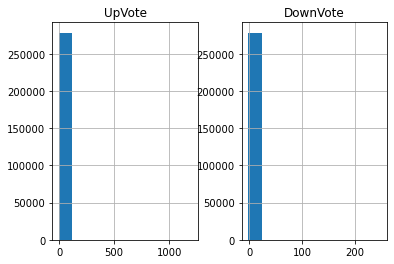

In [1005]:
reviews[['UpVote','DownVote']].hist()

In [1006]:
reviews['DownVote'].describe()

count    278677.000000
mean          0.198664
std           1.041042
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         248.000000
Name: DownVote, dtype: float64

In [1007]:
reviews['UpVote'].describe()

count    278677.000000
mean          1.145936
std           6.579834
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1200.000000
Name: UpVote, dtype: float64

## Finding 1

## Assumption based on distribution: Minimum 5 upvotes/ downvotes are required to classify a review as helpful or not helpful

## Upvotes - 5% of reviews are found helpful overall 
## Downvotes - 0.4% of reviews are not found helpful 

In [223]:
#reviews['Upvote_threshold'] = reviews['UpVote'].apply(lambda x: 1 if x >= 5 else 0)

#reviews['Downvote_threshold'] = reviews['DownVote'].apply(lambda x: 1 if x >= 10 else 0)

In [279]:
#reviews.drop(['Votes_ratio'], axis =1, inplace = True)
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Converted_Date,UpVote,DownVote,Review_len,summary_len
0,A2G5TCU2WDFZ65,31887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",2013-01-19,0,0,306,11
1,A2Q6UWR5PBHTJS,31887,"Sylvia ""Sylvia""","[0, 0]","Our granddaughters are all very girlie, so whe...",5,Sassy!,1358553600,"01 19, 2013",2013-01-19,0,0,233,6
2,AX1QE6IR7CHXM,31887,JJ,"[0, 0]","Wonder my niece wears it every single day, yel...",5,Wonderful and great shipping.,1388620800,"01 2, 2014",2014-01-02,0,0,180,29
3,A1JR9KKF6UKUWW,31887,Queens Meadow,"[0, 0]",Bought this for my niece as part of her fairy ...,5,must have for a fairy princess,1359504000,"01 30, 2013",2013-01-30,0,0,120,30
4,A2A2WZYLU528RO,31887,Julie Gayler,"[0, 0]",My daughter has worn this skirt almost every d...,5,Excellent quality!,1391040000,"01 30, 2014",2014-01-30,0,0,360,18


<AxesSubplot:>

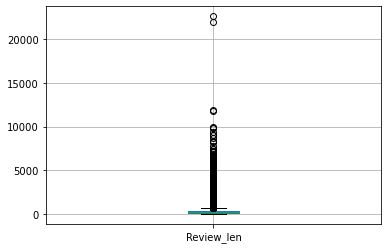

In [284]:
reviews.boxplot('Review_len')

In [286]:
reviews['Review_len'].describe()

count    278677.000000
mean        315.240881
std         330.698977
min           2.000000
25%         139.000000
50%         213.000000
75%         366.000000
max       22646.000000
Name: Review_len, dtype: float64

In [297]:
reviews['Review_len'].quantile(0.93)

736.0

<AxesSubplot:>

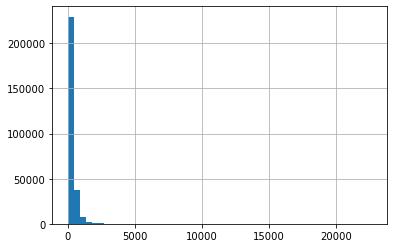

In [1003]:
reviews['Review_len'].hist(bins=50)

In [287]:
IQR = 366-139
139 - 1.5*IQR,366 + 1.5*IQR

(-201.5, 706.5)

In [302]:
reviewer_df.head()

,reviewerID,Upvote_threshold,Downvote_threshold,DownVote,Review_len,Number_Of_Reviews_Per_Reviewer_ID,review_counts_outlier,Average_rating,UpVote,reviewer_quality
0,A001114613O3F18Q5NVR6,1,0,2,279,7,0,4.857143,11,2
1,A00146182PNM90WNNAZ5Q,0,0,4,177,7,0,4.000000,9,2
2,A00165422B2GAUE3EL6Z0,0,0,1,122,6,0,4.333333,0,0
3,A00338282E99B8OR2JYTZ,0,0,0,202,5,0,4.600000,0,0
4,A00354001GE099Q1FL0TU,0,0,0,146,5,0,4.400000,0,0


In [306]:
## Reviewer_Score = Avg rating  + (upvotes > downvotes) + ( 1 if review len between 50 and 706 else 0)

Reviewer_Score = []

for i in range(len(reviewer_df)):
        votes_flag = 0
        len_flag = 0
        if reviewer_df['UpVote'][i] > reviewer_df['DownVote'][i]: votes_flag = 1
        if reviewer_df['Review_len'][i] <=706 and reviewer_df['Review_len'][i] >50 : len_flag = 1
        Score = reviewer_df['Average_rating'][i] + votes_flag + len_flag
        Reviewer_Score.append(Score)


In [307]:
reviewer_df['Reviewer_Score'] = Reviewer_Score

In [309]:
reviewer_df.sort_values(by='Reviewer_Score', ascending = False)

,reviewerID,Upvote_threshold,Downvote_threshold,DownVote,Review_len,Number_Of_Reviews_Per_Reviewer_ID,review_counts_outlier,Average_rating,UpVote,reviewer_quality,Reviewer_Score
30901,A655O9E8A1S00,0,0,0,142,7,0,5.000000,1,1,7.000000
19198,A2U2OJCDRNQNBF,0,0,1,259,5,0,5.000000,3,1,7.000000
32235,AAW61TMS3NX6O,0,0,2,137,6,0,5.000000,4,1,7.000000
3958,A1E0ZGGZE4G1PI,0,0,0,203,5,0,5.000000,1,1,7.000000
19172,A2TZ52TPL5YEQB,0,0,0,350,10,0,5.000000,4,1,7.000000
...,...,...,...,...,...,...,...,...,...,...,...
5232,A1IGM38C7JEPSY,0,0,0,40,5,0,2.000000,0,0,2.000000
7157,A1OZYQ4V83X8K4,0,0,6,871,6,0,1.833333,2,1,1.833333
35617,AMR3S0JUJMDJF,0,0,7,1364,5,0,1.600000,1,1,1.600000
6859,A1O0GKFCQ0OP9I,0,0,1,28,8,0,1.500000,0,0,1.500000


In [313]:
reviewer_df[reviewer_df['Reviewer_Score'] > 6.5]

,reviewerID,Upvote_threshold,Downvote_threshold,DownVote,Review_len,Number_Of_Reviews_Per_Reviewer_ID,review_counts_outlier,Average_rating,UpVote,reviewer_quality,Reviewer_Score
0,A001114613O3F18Q5NVR6,1,0,2,279,7,0,4.857143,11,2,6.857143
11,A01103631SAT3BPLD52LV,0,0,0,430,5,0,4.800000,2,1,6.800000
12,A01194842MEQEG9QC0W1M,0,0,0,134,5,0,5.000000,1,1,7.000000
13,A0145698H8AAYMRXLBD8,0,0,0,281,7,0,4.857143,1,1,6.857143
14,A0148968UM59JS3Y8D1M,0,0,0,105,11,0,4.545455,1,1,6.545455
...,...,...,...,...,...,...,...,...,...,...,...
39351,AZWDXWBNGXR3O,1,0,0,436,5,0,4.600000,8,2,6.600000
39360,AZXGPM8EKSHE9,2,0,5,442,7,0,5.000000,29,5,7.000000
39363,AZXPED8T2SVVF,0,0,1,471,6,0,4.666667,4,1,6.666667
39377,AZZ2HXC308RW1,0,0,0,320,8,0,4.750000,4,1,6.750000


In [325]:
9556/39387

0.2426181227308503

In [315]:
reviewer_df['Reviewer_Score'].describe()

count    39387.000000
mean         5.878635
std          0.786865
min          1.000000
25%          5.400000
50%          6.000000
75%          6.500000
max          7.000000
Name: Reviewer_Score, dtype: float64

<AxesSubplot:>

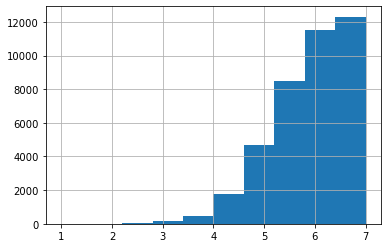

In [1001]:
reviewer_df['Reviewer_Score'].hist()

In [324]:
reviewer_df[reviewer_df['Reviewer_Score'] < 3].count()

reviewerID                           54
Upvote_threshold                     54
Downvote_threshold                   54
DownVote                             54
Review_len                           54
Number_Of_Reviews_Per_Reviewer_ID    54
review_counts_outlier                54
Average_rating                       54
UpVote                               54
reviewer_quality                     54
Reviewer_Score                       54
dtype: int64

In [326]:
54/39387

0.0013710107395841268

<AxesSubplot:xlabel='Review_len', ylabel='UpVote'>

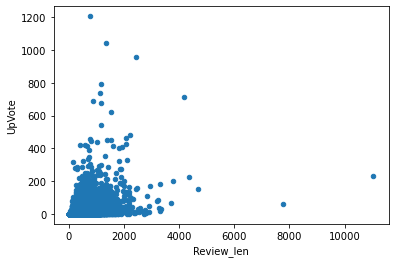

In [963]:
reviewer_df.plot.scatter(x='Review_len',y='UpVote')

In [293]:
reviewer_df[['Review_len','UpVote','DownVote']].corr()

,Review_len,UpVote,DownVote
Review_len,1.000000,0.393869,0.199140
UpVote,0.393869,1.000000,0.399486
DownVote,0.199140,0.399486,1.000000


<AxesSubplot:xlabel='Review_len', ylabel='DownVote'>

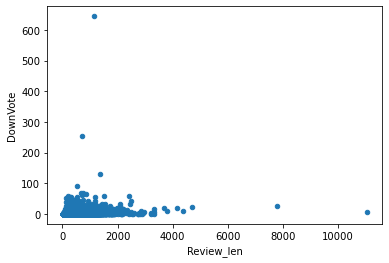

In [964]:
reviewer_df.plot.scatter(x='Review_len',y='DownVote')

## Finding 2

## 24.2% of reviewers are posting helpful reviews and be given a tag like 'trusted reviewer' as they can influence the purchase decision. 

## 0.14% of reviewers are posting reviews that needs to be moderated due to their consistent negative reviews that are'nt found helpful.o.

### REVIEW STREAK !! 

In [334]:
reviews['year'] = reviews['Converted_Date'].apply(lambda x: x.year)

In [337]:
reviews['month'] = reviews['Converted_Date'].apply(lambda x: x.month)

In [336]:
reviews['year'].value_counts()

2013    128518
2014    101071
2012     32654
2011      9846
2010      3458
2009      1661
2008       868
2007       451
2006       115
2005        27
2004         6
2003         2
Name: year, dtype: int64

In [389]:
reviews['Converted_Date'].min()

datetime.date(2003, 3, 29)

In [390]:
reviews['Converted_Date'].max()

datetime.date(2014, 7, 23)

In [344]:
reviews.groupby(['year',asin']).count()

reviewerID  reviewerName  helpful  reviewText  overall  \
year asin                                                                 
2003 B000051SEP           1             1        1           1        1   
     B0000ZEPGA           1             1        1           1        1   
2004 B00005TQI7           1             1        1           1        1   
     B0000B35D9           1             1        1           1        1   
     B0000B35EL           1             1        1           1        1   
...                     ...           ...      ...         ...      ...   
2014 B00KA602SY           6             6        6           6        6   
     B00KCWMG5S           5             5        5           5        5   
     B00KF9180W          10            10       10          10       10   
     B00KGCLROK           5             5        5           5        5   
     B00KKXCJQU           9             9        9           9        9   

                 summary  unixReviewTime  reviewTime  Converted_Date  UpVote  \
year asin                                                                      
2003 B000051SEP        1               1           1               1       1   
     B0000ZEPGA        1               1           1               1       1   
2004 B00005TQI7        1               1           1               1       1   
     B0000B35D9        1               1           1               1       1   
     B0000B35EL        1               1           1               1       1   
...                  ...             ...         ...             ...     ...   
2014 B00KA602SY        6               6           6               6       6   
     B00KCWMG5S        5               5           5               5       5   
     B00KF9180W       10              10          10              10      10   
     B00KGCLROK        5               5           5               5       5   
     B00KKXCJQU        9               9           9               9       9   

                 DownVote  Review_len  summary_len  month  
year asin                                                  
2003 B000051SEP         1           1            1      1  
     B0000ZEPGA         1           1            1      1  
2004 B00005TQI7         1           1            1      1  
     B0000B35D9         1           1            1      1  
     B0000B35EL         1           1            1      1  
...                   ...         ...          ...    ...  
2014 B00KA602SY         6           6            6      6  
     B00KCWMG5S         5           5            5      5  
     B00KF9180W        10          10           10     10  
     B00KGCLROK         5           5            5      5  
     B00KKXCJQU         9           9            9      9  

[62843 rows x 14 columns]

In [369]:
pd.pivot_table(reviews, values=['asin'], columns=['year'], aggfunc= pd.Series.nunique)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
asin,2,6,23,91,338,628,1153,2242,5099,12240,21328,19693


In [933]:
product_timelines = pd.pivot_table(reviews, values=['asin'], columns=['year'], aggfunc= pd.Series.nunique)
product_timelines = product_timelines.transpose()
product_timelines.rename({'asin':'No. of unique products reviewed'}, axis = 1, inplace = True)
product_timelines

,No. of unique products reviewed
year,
2003,2
2004,6
2005,23
2006,91
2007,338
2008,628
2009,1153
2010,2242
2011,5099


<AxesSubplot:title={'center':'No. of unique products reviewed over time'}, xlabel='year'>

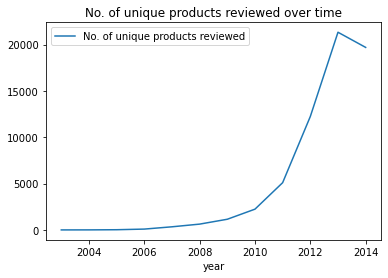

In [935]:
product_timelines.plot(title = 'No. of unique products reviewed over time')

In [368]:
pd.pivot_table(reviews, values=['asin'], columns=['year'], aggfunc= pd.Series.count)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
asin,2,6,27,115,451,868,1661,3458,9846,32654,128518,101071


In [908]:
timeline = pd.pivot_table(reviews, values=['asin'], columns=['year'], aggfunc= pd.Series.count)
timeline.reset_index(drop=True, inplace = True)

In [925]:
#timeline = timeline.transpose()
timeline.rename({0:'Reviews_count'}, axis = 1, inplace = True)
timeline

,Reviews_count
year,
2003,2
2004,6
2005,27
2006,115
2007,451
2008,868
2009,1661
2010,3458
2011,9846


<AxesSubplot:title={'center':'Review counts over years'}, xlabel='year'>

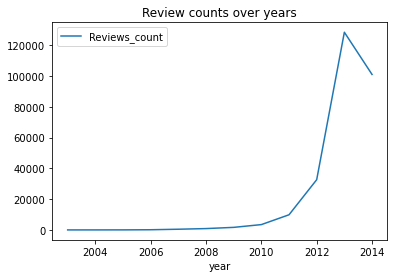

In [932]:
timeline.plot(title = 'Review counts over years')

In [355]:
pd.crosstab(reviews['asin'], reviews['year'], dropna=False)

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
asin,,,,,,,,,,,,
123456479,0,0,0,0,0,0,0,0,0,1,3,2
1608299953,0,0,0,0,0,0,0,6,4,2,1,0
1617160377,0,0,0,0,0,0,0,0,10,3,3,0
31887,0,0,0,0,0,0,0,0,2,3,10,8
B00001W0KA,0,0,0,0,0,0,1,0,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
B00KA602SY,0,0,0,0,0,0,0,0,0,0,0,6
B00KCWMG5S,0,0,0,0,0,0,0,0,0,0,0,5
B00KF9180W,0,0,0,0,0,0,0,0,0,0,0,10


In [372]:
rating_yr = pd.pivot_table(reviews, index = ['asin'], values=['overall'], columns=['year'], aggfunc= np.mean)
rating_yr

overall                                                          \
year          2003 2004 2005 2006 2007 2008 2009      2010  2011      2012   
asin                                                                         
123456479      NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN   NaN  5.000000   
1608299953     NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.666667  4.25  3.000000   
1617160377     NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  4.60  4.333333   
31887          NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  5.00  5.000000   
B00001W0KA     NaN  NaN  NaN  NaN  NaN  NaN  4.0       NaN  5.00  4.500000   
...            ...  ...  ...  ...  ...  ...  ...       ...   ...       ...   
B00KA602SY     NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN   NaN       NaN   
B00KCWMG5S     NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN   NaN       NaN   
B00KF9180W     NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN   NaN       NaN   
B00KGCLROK     NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN   NaN       NaN   
B00KKXCJQU     NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN   NaN       NaN   

                            
year        2013      2014  
asin                        
123456479   4.00  4.000000  
1608299953  5.00       NaN  
1617160377  5.00       NaN  
31887       4.80  4.125000  
B00001W0KA  4.75       NaN  
...          ...       ...  
B00KA602SY   NaN  3.833333  
B00KCWMG5S   NaN  2.400000  
B00KF9180W   NaN  4.800000  
B00KGCLROK   NaN  4.400000  
B00KKXCJQU   NaN  5.000000  

[23033 rows x 12 columns]

In [381]:
rating_yr.fillna(0, inplace = True)
rating_yr

overall                                                          \
year          2003 2004 2005 2006 2007 2008 2009      2010  2011      2012   
asin                                                                         
123456479      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.00  5.000000   
1608299953     0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.666667  4.25  3.000000   
1617160377     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  4.60  4.333333   
31887          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  5.00  5.000000   
B00001W0KA     0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.000000  5.00  4.500000   
...            ...  ...  ...  ...  ...  ...  ...       ...   ...       ...   
B00KA602SY     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.00  0.000000   
B00KCWMG5S     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.00  0.000000   
B00KF9180W     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.00  0.000000   
B00KGCLROK     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.00  0.000000   
B00KKXCJQU     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.00  0.000000   

                            
year        2013      2014  
asin                        
123456479   4.00  4.000000  
1608299953  5.00  0.000000  
1617160377  5.00  0.000000  
31887       4.80  4.125000  
B00001W0KA  4.75  0.000000  
...          ...       ...  
B00KA602SY  0.00  3.833333  
B00KCWMG5S  0.00  2.400000  
B00KF9180W  0.00  4.800000  
B00KGCLROK  0.00  4.400000  
B00KKXCJQU  0.00  5.000000  

[23033 rows x 12 columns]

In [385]:
rating_yr = rating_yr.transpose()
rating_yr 

asin          123456479  1608299953  1617160377  31887  B00001W0KA  \
        year                                                         
overall 2003        0.0    0.000000    0.000000  0.000        0.00   
        2004        0.0    0.000000    0.000000  0.000        0.00   
        2005        0.0    0.000000    0.000000  0.000        0.00   
        2006        0.0    0.000000    0.000000  0.000        0.00   
        2007        0.0    0.000000    0.000000  0.000        0.00   
        2008        0.0    0.000000    0.000000  0.000        0.00   
        2009        0.0    0.000000    0.000000  0.000        4.00   
        2010        0.0    4.666667    0.000000  0.000        0.00   
        2011        0.0    4.250000    4.600000  5.000        5.00   
        2012        5.0    3.000000    4.333333  5.000        4.50   
        2013        4.0    5.000000    5.000000  4.800        4.75   
        2014        4.0    0.000000    0.000000  4.125        0.00   

asin          B00001WRHJ  B00004SR8W  B00004SR8Z  B00004SR9P  B00004U1J2  ...  \
        year                                                              ...   
overall 2003        0.00         0.0    0.000000    0.000000    0.000000  ...   
        2004        0.00         0.0    0.000000    0.000000    0.000000  ...   
        2005        0.00         0.0    0.000000    0.000000    0.000000  ...   
        2006        0.00         0.0    0.000000    0.000000    0.000000  ...   
        2007        0.00         0.0    0.000000    5.000000    0.000000  ...   
        2008        0.00         0.0    0.000000    5.000000    0.000000  ...   
        2009        0.00         0.0    5.000000    0.000000    0.000000  ...   
        2010        4.00         5.0    0.000000    5.000000    0.000000  ...   
        2011        4.00         5.0    4.000000    5.000000    1.000000  ...   
        2012        0.00         0.0    4.166667    4.400000    4.000000  ...   
        2013        3.25         4.0    4.750000    2.750000    4.142857  ...   
        2014        0.00         5.0    4.666667    3.666667    4.333333  ...   

asin          B00K0BPFY0  B00K551QR6  B00K5T4NHC  B00K8J06CK  B00KA2X4QK  \
        year                                                               
overall 2003         0.0         0.0    0.000000         0.0         0.0   
        2004         0.0         0.0    0.000000         0.0         0.0   
        2005         0.0         0.0    0.000000         0.0         0.0   
        2006         0.0         0.0    0.000000         0.0         0.0   
        2007         0.0         0.0    0.000000         0.0         0.0   
        2008         0.0         0.0    0.000000         0.0         0.0   
        2009         0.0         0.0    0.000000         0.0         0.0   
        2010         0.0         0.0    0.000000         0.0         0.0   
        2011         0.0         0.0    0.000000         0.0         0.0   
        2012         0.0         0.0    0.000000         0.0         0.0   
        2013         0.0         0.0    0.000000         0.0         0.0   
        2014         4.6         3.5    4.857143         4.6         4.6   

asin          B00KA602SY  B00KCWMG5S  B00KF9180W  B00KGCLROK  B00KKXCJQU  
        year                                                              
overall 2003    0.000000         0.0         0.0         0.0         0.0  
        2004    0.000000         0.0         0.0         0.0         0.0  
        2005    0.000000         0.0         0.0         0.0         0.0  
        2006    0.000000         0.0         0.0         0.0         0.0  
        2007    0.000000         0.0         0.0         0.0         0.0  
        2008    0.000000         0.0         0.0         0.0         0.0  
        2009    0.000000         0.0         0.0         0.0         0.0  
        2010    0.000000         0.0         0.0         0.0         0.0  
        2011    0.000000         0.0         0.0         0.0         

In [492]:
def trend_calc(prod_id):
    #trend = rating_yr[prod_id].rolling(window=3).mean().to_frame().reset_index().drop('level_0', axis = 1)
    #trend.fillna(0, inplace = True)
    y = list(rating_yr[prod_id])
    x = []
    x.append(range(len(y)))                 
    x.append([1 for ele in range(len(y))]) 
    y = np.matrix(y).T
    x = np.matrix(x).T   
    betas = ((x.T*x).I*x.T*y)
    return round(betas[0].tolist()[0][0]*100,2)

In [496]:
metadata['review_trend'] = metadata['asin'].apply(lambda x: trend_calc(x))
metadata

,metadataid,asin,salesrank,imurl,categories,title,related,Category_type,Gender,review_trend,review_trend1
0,2005401,B00004SR8Z,{'Clothing': 1631},http://ecx.images-amazon.com/images/I/41RfWLMD...,"[['Clothing, Shoes & Jewelry', 'Luggage & Trav...",Lewis N. Clark Deluxe Neck Stash,"{'also_bought': ['B004RJWFDU', 'B00920ZC3O', '...",others,unisex,51.84,51.84
1,2217897,B0000ZE74A,{'Clothing': 4742},http://ecx.images-amazon.com/images/I/41ryA-RO...,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",Vanity Fair Women's Lollipop Plus Size Cuff Le...,"{'also_bought': ['B004PEHJ6U', 'B0000TF5VK', '...",clothing,women,40.70,40.70
2,2220611,B00012O12A,{'Clothing': 4},http://ecx.images-amazon.com/images/I/41Dd7rCH...,"[['Clothing, Shoes & Jewelry', 'Men', 'Clothin...",Levi's Men's 505 Regular-Fit Jean,"{'also_bought': ['B0018OR118', 'B003M2X1VI', '...",clothing,men,48.67,48.67
3,2324985,B0002XSXWC,{'Clothing': 300},http://ecx.images-amazon.com/images/I/41-HS7D7...,"[['Sports & Outdoors', 'Clothing', 'Men', 'Shi...",Columbia Men's Bonehead Short Sleeve Fishing S...,"{'also_bought': ['B0031RFWMU', 'B0050VLSLO', '...",clothing,men,56.57,56.57
4,2348742,B00066TWMU,{'Clothing': 1199},http://ecx.images-amazon.com/images/I/51UNLUB4...,"[['Clothing, Shoes & Jewelry', 'ASICS'], ['Clo...",ASICS Mesh Backpack,"{'also_bought': ['B009DB3RS4', 'B001PFA35G', '...",others,unisex,32.81,32.81
...,...,...,...,...,...,...,...,...,...,...,...
23028,9014582,B00GMFP3C2,{'Clothing': 8963},http://ecx.images-amazon.com/images/I/4146-7BI...,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",Vintage Retro Bikini Polka High Waist Short Bo...,"{'also_bought': ['B00J28IYTA', 'B00L22SJ4E', '...",clothing,women,13.46,13.46
23029,9055939,B00GUXA3E4,{'Clothing': 1237461},http://ecx.images-amazon.com/images/I/41LCQrVf...,"[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...",ShoSho Women's Plus Size Print &amp; Pattern L...,"{'also_bought': ['B00J3C20DG', 'B00HY2T5TO', '...",clothing,women,12.31,12.31
23030,9180895,B00HUZW7PY,{'Clothing': 13102},http://ecx.images-amazon.com/images/I/51kFbUjn...,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",Women'S Poly Span Various Print High &amp; Low...,"{'also_bought': ['B00IZMUT60', 'B00H4HU7A0', '...",clothing,women,16.99,16.99
23031,9202020,B00I07HQMU,{'Jewelry': 485},http://ecx.images-amazon.com/images/I/41OPXxBC...,"[['Clothing, Shoes & Jewelry', 'Novelty, Costu...",Keepsake Window Jewelry Box Organizer Storage ...,"{'also_bought': ['B001KKYN2U', 'B00570DVLS', '...",jewelry,unisex,42.83,42.83


In [497]:
metadata['review_trend'].describe()
#[metadata['Category_type']== 'shoes']

count    23033.000000
mean        33.860008
std         10.573572
min        -13.110000
25%         27.270000
50%         33.040000
75%         41.960000
max         62.940000
Name: review_trend, dtype: float64

<AxesSubplot:>

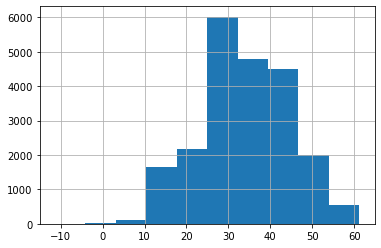

In [298]:
metadata['review_trend'].hist()

In [1010]:
metadata[metadata['review_trend1'] > 0].sort_values(by = ['review_trend1'])['review_trend1'].count()

23014

## Finding 3

## List of products having negative rating trend that can be  moderated - classify by category 

In [502]:
metadata.to_csv("metadata_updated.csv")
reviews.to_csv("reviews_updated.csv")
reviewer_df.to_csv("reviewer_df.csv")
rating_yr.to_csv("rating_yr.csv")


## Sentiment analysis

In [500]:
!pip install textblob

     |████████████████████████████████| 636 kB 12.0 MB/s eta 0:00:01


In [508]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [558]:
sentence = "Have they lost their minds??!! Over 100$ for a costume!! Amazon, you are an idiot. This is an inexpensive costume. It better include a meeting with Tom Hanks for that price."
sentence

'Have they lost their minds??!! Over 100$ for a costume!! Amazon, you are an idiot. This is an inexpensive costume. It better include a meeting with Tom Hanks for that price.'

In [563]:
analysis = TextBlob(sentence).sentiment
print(analysis)

Sentiment(polarity=-0.15000000000000002, subjectivity=0.65)


In [560]:
# Applying the NaiveBayesAnalyzer
blob_object = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())


# Running sentiment analysis
analysis = blob_object.sentiment
print(analysis)

Sentiment(classification='pos', p_pos=0.5153718510206156, p_neg=0.48462814897938344)


In [511]:
#import nltk
#nltk.download('movie_reviews')

In [515]:
#nltk.download('punkt')

In [565]:
reviews['reviewText'].fillna("", inplace = True)

In [566]:
review_sentiment=[]
review_polarity=[]
review_subjectivity=[]

for item in range(len(reviews)):
    
    #print("\n",reviews['reviewText'][item])
    
    # Identifying polarity
    analysis = TextBlob(reviews['reviewText'][item]).sentiment
    
    if analysis[0] < 0:
        review_sentiment.append('negative')
    elif analysis[0] == 0:
        review_sentiment.append("neutral")
    else:
        review_sentiment.append("positive")
   
    review_polarity.append(analysis[0])
    review_subjectivity.append(analysis[1])
    
reviews['Sentiment'] = review_sentiment
reviews['Polarity'] = review_polarity
reviews['subjectivity'] = review_subjectivity

reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Converted_Date,UpVote,DownVote,Review_len,summary_len,year,month,Sentiment,Polarity,subjectivity
0,A2G5TCU2WDFZ65,31887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",2013-01-19,0,0,306,11,2013,1,positive,0.412222,0.584815
1,A2Q6UWR5PBHTJS,31887,"Sylvia ""Sylvia""","[0, 0]","Our granddaughters are all very girlie, so whe...",5,Sassy!,1358553600,"01 19, 2013",2013-01-19,0,0,233,6,2013,1,positive,0.277500,0.430000
2,AX1QE6IR7CHXM,31887,JJ,"[0, 0]","Wonder my niece wears it every single day, yel...",5,Wonderful and great shipping.,1388620800,"01 2, 2014",2014-01-02,0,0,180,29,2014,1,positive,0.171131,0.541667
3,A1JR9KKF6UKUWW,31887,Queens Meadow,"[0, 0]",Bought this for my niece as part of her fairy ...,5,must have for a fairy princess,1359504000,"01 30, 2013",2013-01-30,0,0,120,30,2013,1,neutral,0.000000,0.000000
4,A2A2WZYLU528RO,31887,Julie Gayler,"[0, 0]",My daughter has worn this skirt almost every d...,5,Excellent quality!,1391040000,"01 30, 2014",2014-01-30,0,0,360,18,2014,1,positive,0.205357,0.566270


<AxesSubplot:>

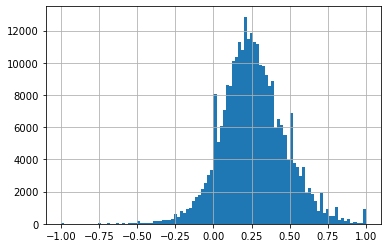

In [966]:
reviews['Polarity'].hist(bins = 100) #Graph

In [572]:
reviews = reviews.merge(metadata[['asin','Category_type']], on='asin', how='left')

#metadata.info()

In [573]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Converted_Date,UpVote,DownVote,Review_len,summary_len,year,month,Sentiment,Polarity,subjectivity,Category_type
0,A2G5TCU2WDFZ65,31887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",2013-01-19,0,0,306,11,2013,1,positive,0.412222,0.584815,clothing
1,A2Q6UWR5PBHTJS,31887,"Sylvia ""Sylvia""","[0, 0]","Our granddaughters are all very girlie, so whe...",5,Sassy!,1358553600,"01 19, 2013",2013-01-19,0,0,233,6,2013,1,positive,0.277500,0.430000,clothing
2,AX1QE6IR7CHXM,31887,JJ,"[0, 0]","Wonder my niece wears it every single day, yel...",5,Wonderful and great shipping.,1388620800,"01 2, 2014",2014-01-02,0,0,180,29,2014,1,positive,0.171131,0.541667,clothing
3,A1JR9KKF6UKUWW,31887,Queens Meadow,"[0, 0]",Bought this for my niece as part of her fairy ...,5,must have for a fairy princess,1359504000,"01 30, 2013",2013-01-30,0,0,120,30,2013,1,neutral,0.000000,0.000000,clothing
4,A2A2WZYLU528RO,31887,Julie Gayler,"[0, 0]",My daughter has worn this skirt almost every d...,5,Excellent quality!,1391040000,"01 30, 2014",2014-01-30,0,0,360,18,2014,1,positive,0.205357,0.566270,clothing


<AxesSubplot:>

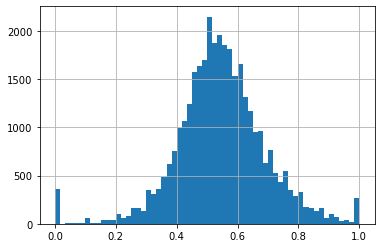

In [976]:
reviews[reviews['DownVote'] > 0]['subjectivity'].hist(bins = 60)

<AxesSubplot:>

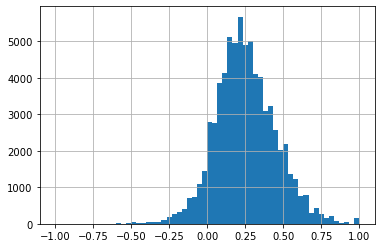

In [582]:
reviews[reviews['Category_type'] == 'shoes']['Polarity'].hist(bins = 60)

<AxesSubplot:>

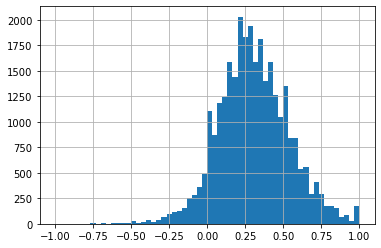

In [581]:
reviews[reviews['Category_type'] == 'jewelry']['Polarity'].hist(bins = 60)

In [585]:
reviews[reviews['Category_type'] == 'clothing']['Polarity'].describe()

count    116612.000000
mean          0.254107
std           0.210681
min          -1.000000
25%           0.122222
50%           0.246083
75%           0.383333
max           1.000000
Name: Polarity, dtype: float64

In [589]:
reviews.groupby('Category_type')['reviewerID'].count()  ## Graph

Category_type
clothing    116612
jewelry      30018
others       60298
shoes        71749
Name: reviewerID, dtype: int64

<AxesSubplot:ylabel='overall'>

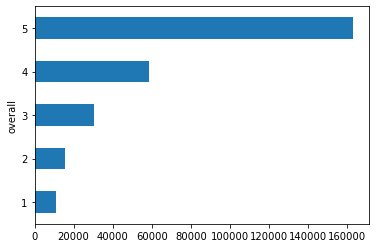

In [961]:
rev_graph = reviews.groupby('overall')['reviewerID'].count()  #Graph
rev_graph.plot.barh(y)

In [592]:
reviews.groupby('Category_type')['overall'].mean()  ## Graph

Category_type
clothing    4.178824
jewelry     4.314545
others      4.294919
shoes       4.282025
Name: overall, dtype: float64

In [593]:
reviews[reviews['Category_type'] == 'clothing'].groupby('overall')['reviewerID'].count()  #Graph

overall
1     5110
2     7218
3    13956
4    25753
5    64575
Name: reviewerID, dtype: int64

In [594]:
reviews[reviews['Category_type'] == 'shoes'].groupby('overall')['reviewerID'].count()  #Graph

overall
1     2307
2     4098
3     7593
4    14806
5    42945
Name: reviewerID, dtype: int64

In [595]:
reviews[reviews['Category_type'] == 'jewelry'].groupby('overall')['reviewerID'].count()  #Graph

overall
1     1353
2     1293
3     2895
4     5495
5    18982
Name: reviewerID, dtype: int64

In [596]:
reviews[reviews['Category_type'] == 'others'].groupby('overall')['reviewerID'].count()  #Graph

overall
1     2422
2     2854
3     5981
4    12303
5    36738
Name: reviewerID, dtype: int64

In [623]:
#!pip install wordcloud

In [675]:
from collections import Counter
import matplotlib.pyplot as plt
import wordcloud
from nltk.stem import PorterStemmer
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

In [682]:
def basic_clean(text):

    wnl = nltk.stem.WordNetLemmatizer() # GRouping owrds to root word
    ps = PorterStemmer()
    
    stopwords = nltk.corpus.stopwords.words('english')  #stopwords like a, the, is
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower()) # htmls tags, :)
    words = re.sub(r'[^\w\s]', '', text).split() #Punctuation
    
    words = [wnl.lemmatize(word) for word in words if word not in stopwords]
    words = [ps.stem(word) for word in words if word not in stopwords]
    return words

In [685]:
 basic_clean("hello :), the programer is programming a program")

['hello', 'program', 'program', 'program']

In [608]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeyasriramesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeyasriramesh/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Frequently used words - NGrams

Text(0.5, 0, '# of Occurances')

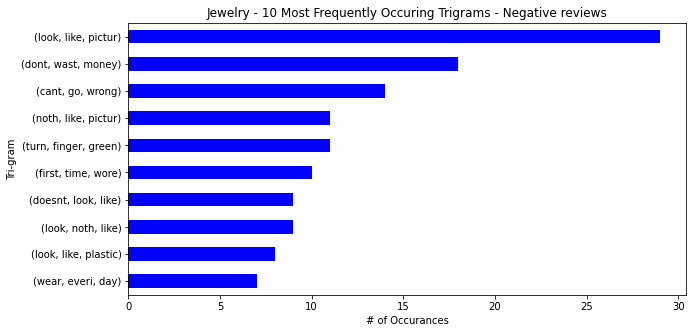

In [968]:
df = reviews[(reviews['Polarity'] < 0) & (reviews['Category_type'] == 'jewelry') & (reviews['year'] > 2010)]
words = basic_clean(''.join(str(df['reviewText'].tolist())))
tri_grams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]
tri_grams.sort_values().plot.barh(color='blue', width=.5, figsize=(10, 5))
plt.title('Jewelry - 10 Most Frequently Occuring Trigrams - Negative reviews')
plt.ylabel('Tri-gram')
plt.xlabel('# of Occurances') ## Graph

Text(0.5, 0, '# of Occurances')

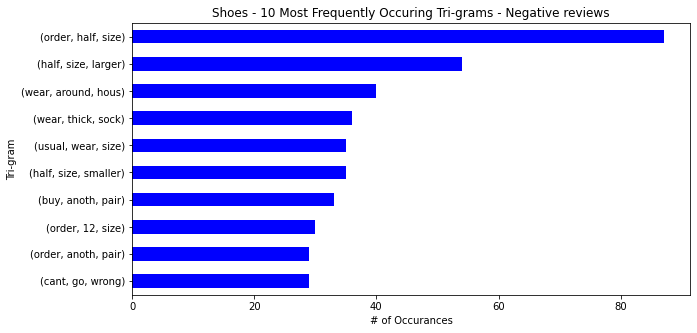

In [969]:
df = reviews[(reviews['Polarity'] < 0) & (reviews['Category_type'] == 'shoes') & (reviews['year'] > 2010)]
words = basic_clean(''.join(str(df['reviewText'].tolist())))
tri_grams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]
tri_grams.sort_values().plot.barh(color='blue', width=.5, figsize=(10, 5))
plt.title('Shoes - 10 Most Frequently Occuring Tri-grams - Negative reviews')
plt.ylabel('Tri-gram')
plt.xlabel('# of Occurances') ## Graph

Text(0.5, 0, '# of Occurances')

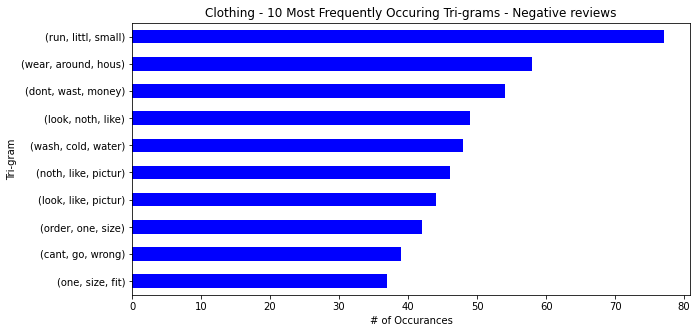

In [970]:
df = reviews[(reviews['Polarity'] < 0) & (reviews['Category_type'] == 'clothing') & (reviews['year'] > 2010)]
words = basic_clean(''.join(str(df['reviewText'].tolist())))
tri_grams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]
tri_grams.sort_values().plot.barh(color='blue', width=.5, figsize=(10, 5))
plt.title('Clothing - 10 Most Frequently Occuring Tri-grams - Negative reviews')
plt.ylabel('Tri-gram')
plt.xlabel('# of Occurances') ## Graph

In [716]:
#metadata['salesrank'].fillna('{:1000000}', inplace = True)
#metadata['salesrank'].replace('{}','{:1000000}', inplace = True)

In [721]:
metadata['converted_salesrank'] = metadata['salesrank'].apply(lambda x: int(x.split(":")[1].replace('}','').strip()))

In [717]:
metadata['salesrank'].value_counts().to_frame().sort_values(by='salesrank')

,salesrank
{'Clothing': 3340},1
{'Clothing': 3764},1
{'Clothing': 25066},1
{'Clothing': 16090},1
{'Clothing': 74820},1
...,...
{'Clothing': 1214},4
{'Clothing': 494},5
{'Shoes': 850},5
{'Clothing': 896},5


In [997]:
metadata = pd.merge(metadata, reviews.groupby('asin')['overall'].count().to_frame(), on ='asin')
metadata.head()

,metadataid,asin,salesrank,imurl,categories,title,related,Category_type,Gender,review_trend1,converted_salesrank,overall_x,overall_y
0,2005401,B00004SR8Z,{'Clothing': 1631},http://ecx.images-amazon.com/images/I/41RfWLMD...,"[['Clothing, Shoes & Jewelry', 'Luggage & Trav...",Lewis N. Clark Deluxe Neck Stash,"{'also_bought': ['B004RJWFDU', 'B00920ZC3O', '...",others,unisex,51.84,1631,4.545455,22
1,2217897,B0000ZE74A,{'Clothing': 4742},http://ecx.images-amazon.com/images/I/41ryA-RO...,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",Vanity Fair Women's Lollipop Plus Size Cuff Le...,"{'also_bought': ['B004PEHJ6U', 'B0000TF5VK', '...",clothing,women,40.70,4742,4.363636,11
2,2220611,B00012O12A,{'Clothing': 4},http://ecx.images-amazon.com/images/I/41Dd7rCH...,"[['Clothing, Shoes & Jewelry', 'Men', 'Clothin...",Levi's Men's 505 Regular-Fit Jean,"{'also_bought': ['B0018OR118', 'B003M2X1VI', '...",clothing,men,48.67,4,4.153439,189
3,2324985,B0002XSXWC,{'Clothing': 300},http://ecx.images-amazon.com/images/I/41-HS7D7...,"[['Sports & Outdoors', 'Clothing', 'Men', 'Shi...",Columbia Men's Bonehead Short Sleeve Fishing S...,"{'also_bought': ['B0031RFWMU', 'B0050VLSLO', '...",clothing,men,56.57,300,4.578947,38
4,2348742,B00066TWMU,{'Clothing': 1199},http://ecx.images-amazon.com/images/I/51UNLUB4...,"[['Clothing, Shoes & Jewelry', 'ASICS'], ['Clo...",ASICS Mesh Backpack,"{'also_bought': ['B009DB3RS4', 'B001PFA35G', '...",others,unisex,32.81,1199,3.857143,14


In [728]:
metadata[metadata['Category_type'] == 'clothing'][['review_trend1','converted_salesrank','overall']].corr()

,review_trend1,converted_salesrank,overall
review_trend1,1.000000,-0.093886,0.407325
converted_salesrank,-0.093886,1.000000,-0.010519
overall,0.407325,-0.010519,1.000000


In [729]:
metadata[metadata['Category_type'] == 'shoes'][['review_trend1','converted_salesrank','overall']].corr()

,review_trend1,converted_salesrank,overall
review_trend1,1.000000,-0.031282,0.359208
converted_salesrank,-0.031282,1.000000,0.020262
overall,0.359208,0.020262,1.000000


In [730]:
metadata[['review_trend1','converted_salesrank','overall','']].corr()

,review_trend1,converted_salesrank,overall
review_trend1,1.000000,-0.020162,0.433118
converted_salesrank,-0.020162,1.000000,-0.013185
overall,0.433118,-0.013185,1.000000


In [1000]:
metadata[['review_trend1','converted_salesrank','overall','review_count']].corr()

,review_trend1,converted_salesrank,overall,review_count
review_trend1,1.000000,-0.027874,0.392938,0.274183
converted_salesrank,-0.027874,1.000000,-0.006537,-0.060010
overall,0.392938,-0.006537,1.000000,0.003073
review_count,0.274183,-0.060010,0.003073,1.000000


In [999]:
metadata.rename({'overall_x':'overall','overall_y':'review_count'}, axis =1 , inplace = True)

## No conclusion

## Recommended products

In [736]:
len(reviews['reviewerID'].unique())

39387

In [737]:
reviews.shape

(278677, 20)

In [757]:
reviewer_df

,reviewerID,Upvote_threshold,Downvote_threshold,DownVote,Review_len,Number_Of_Reviews_Per_Reviewer_ID,review_counts_outlier,Average_rating,UpVote,reviewer_quality,Reviewer_Score
0,A001114613O3F18Q5NVR6,1,0,2,279,7,0,4.857143,11,2,6.857143
1,A00146182PNM90WNNAZ5Q,0,0,4,177,7,0,4.000000,9,2,6.000000
2,A00165422B2GAUE3EL6Z0,0,0,1,122,6,0,4.333333,0,0,5.333333
3,A00338282E99B8OR2JYTZ,0,0,0,202,5,0,4.600000,0,0,5.600000
4,A00354001GE099Q1FL0TU,0,0,0,146,5,0,4.400000,0,0,5.400000
...,...,...,...,...,...,...,...,...,...,...,...
39382,AZZMQ85DPFEG3,0,0,3,153,11,0,2.909091,5,1,4.909091
39383,AZZNK89PXD006,0,0,0,886,5,0,3.800000,2,1,4.800000
39384,AZZT1ERHBSNQ8,0,0,0,59,10,0,4.500000,0,0,5.500000
39385,AZZTOUKVTUMVM,0,0,2,319,6,0,3.500000,3,1,5.500000


In [804]:
def get_orders(x):
    return reviews[reviews['reviewerID']== x]['asin'].values

In [830]:
reviewer_df['orders'] = reviewer_df['reviewerID'].apply(lambda x: get_orders(x))
reviewer_df.head()

,reviewerID,Upvote_threshold,Downvote_threshold,DownVote,Review_len,Number_Of_Reviews_Per_Reviewer_ID,review_counts_outlier,Average_rating,UpVote,reviewer_quality,Reviewer_Score,orders,order_count
0,A001114613O3F18Q5NVR6,1,0,2,279,7,0,4.857143,11,2,6.857143,"[B000J6ZYL0, B0016JNS44, B001T54XA8, B004AZXO1...",7
1,A00146182PNM90WNNAZ5Q,0,0,4,177,7,0,4.000000,9,2,6.000000,"[B000JJX7C0, B000MX3SH2, B003CO205E, B006Y4QDV...",7
2,A00165422B2GAUE3EL6Z0,0,0,1,122,6,0,4.333333,0,0,5.333333,"[B007WADN4G, B007WAEBPQ, B007WAT3I6, B008G51WH...",6
3,A00338282E99B8OR2JYTZ,0,0,0,202,5,0,4.600000,0,0,5.600000,"[B002FA5B8O, B003F06XQW, B003F8BKGW, B00768LFY...",5
4,A00354001GE099Q1FL0TU,0,0,0,146,5,0,4.400000,0,0,5.400000,"[B00387EEYA, B003RYZY8E, B0058XN9ZC, B0058YTOP...",5


In [831]:
reviewer_df['order_count']=reviewer_df['orders'].apply(lambda x: len(x))
reviewer_df.head()

,reviewerID,Upvote_threshold,Downvote_threshold,DownVote,Review_len,Number_Of_Reviews_Per_Reviewer_ID,review_counts_outlier,Average_rating,UpVote,reviewer_quality,Reviewer_Score,orders,order_count
0,A001114613O3F18Q5NVR6,1,0,2,279,7,0,4.857143,11,2,6.857143,"[B000J6ZYL0, B0016JNS44, B001T54XA8, B004AZXO1...",7
1,A00146182PNM90WNNAZ5Q,0,0,4,177,7,0,4.000000,9,2,6.000000,"[B000JJX7C0, B000MX3SH2, B003CO205E, B006Y4QDV...",7
2,A00165422B2GAUE3EL6Z0,0,0,1,122,6,0,4.333333,0,0,5.333333,"[B007WADN4G, B007WAEBPQ, B007WAT3I6, B008G51WH...",6
3,A00338282E99B8OR2JYTZ,0,0,0,202,5,0,4.600000,0,0,5.600000,"[B002FA5B8O, B003F06XQW, B003F8BKGW, B00768LFY...",5
4,A00354001GE099Q1FL0TU,0,0,0,146,5,0,4.400000,0,0,5.400000,"[B00387EEYA, B003RYZY8E, B0058XN9ZC, B0058YTOP...",5


In [832]:
reviewer_df['order_count'].describe()

count    39387.000000
mean         7.075355
std          3.585250
min          5.000000
25%          5.000000
50%          6.000000
75%          8.000000
max        136.000000
Name: order_count, dtype: float64

In [834]:
def common_list(orders_list):
    recommends =[]
    for item in orders_list:
        related = metadata[metadata['asin'] == item]['related']
        related = str(related).split("'")
        related = [item for item in related if len(item) > 4 ]
        recommends.append(related)
    recommends = np.concatenate(recommends, axis = 0)
    common_products = set(orders_list).intersection(set(recommends))
    return list(common_products)

In [835]:
reviewer_df['orders_from_related'] = reviewer_df['orders'].apply(lambda x: common_list(x))
reviewer_df.head()

,reviewerID,Upvote_threshold,Downvote_threshold,DownVote,Review_len,Number_Of_Reviews_Per_Reviewer_ID,review_counts_outlier,Average_rating,UpVote,reviewer_quality,Reviewer_Score,orders,order_count,orders_from_related
0,A001114613O3F18Q5NVR6,1,0,2,279,7,0,4.857143,11,2,6.857143,"[B000J6ZYL0, B0016JNS44, B001T54XA8, B004AZXO1...",7,[]
1,A00146182PNM90WNNAZ5Q,0,0,4,177,7,0,4.000000,9,2,6.000000,"[B000JJX7C0, B000MX3SH2, B003CO205E, B006Y4QDV...",7,[]
2,A00165422B2GAUE3EL6Z0,0,0,1,122,6,0,4.333333,0,0,5.333333,"[B007WADN4G, B007WAEBPQ, B007WAT3I6, B008G51WH...",6,[B00BLW2PZY]
3,A00338282E99B8OR2JYTZ,0,0,0,202,5,0,4.600000,0,0,5.600000,"[B002FA5B8O, B003F06XQW, B003F8BKGW, B00768LFY...",5,[]
4,A00354001GE099Q1FL0TU,0,0,0,146,5,0,4.400000,0,0,5.400000,"[B00387EEYA, B003RYZY8E, B0058XN9ZC, B0058YTOP...",5,[]


In [841]:
reviewer_df['count_orders_from_related'] = reviewer_df['orders_from_related'].apply(lambda x: len(x))
reviewer_df.head()

,reviewerID,Upvote_threshold,Downvote_threshold,DownVote,Review_len,Number_Of_Reviews_Per_Reviewer_ID,review_counts_outlier,Average_rating,UpVote,reviewer_quality,Reviewer_Score,orders,order_count,orders_from_related,count_orders_from_related
0,A001114613O3F18Q5NVR6,1,0,2,279,7,0,4.857143,11,2,6.857143,"[B000J6ZYL0, B0016JNS44, B001T54XA8, B004AZXO1...",7,[],0
1,A00146182PNM90WNNAZ5Q,0,0,4,177,7,0,4.000000,9,2,6.000000,"[B000JJX7C0, B000MX3SH2, B003CO205E, B006Y4QDV...",7,[],0
2,A00165422B2GAUE3EL6Z0,0,0,1,122,6,0,4.333333,0,0,5.333333,"[B007WADN4G, B007WAEBPQ, B007WAT3I6, B008G51WH...",6,[B00BLW2PZY],1
3,A00338282E99B8OR2JYTZ,0,0,0,202,5,0,4.600000,0,0,5.600000,"[B002FA5B8O, B003F06XQW, B003F8BKGW, B00768LFY...",5,[],0
4,A00354001GE099Q1FL0TU,0,0,0,146,5,0,4.400000,0,0,5.400000,"[B00387EEYA, B003RYZY8E, B0058XN9ZC, B0058YTOP...",5,[],0


<AxesSubplot:>

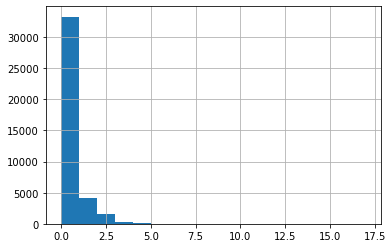

In [845]:
reviewer_df['count_orders_from_related'].hist(bins=17)

In [853]:
reviewer_df['count_orders_from_related'].quantile(0.84), reviewer_df['count_orders_from_related'].quantile(0.85)

(0.0, 1.0)

## Finding - 15% of people have purchased atleast 1 product from the recommended items (related column)

In [856]:
reviewer_df[reviewer_df['count_orders_from_related'] > 0]['order_count'].describe()

count    6098.000000
mean        8.952115
std         6.033720
min         5.000000
25%         5.000000
50%         7.000000
75%        10.000000
max       136.000000
Name: order_count, dtype: float64

<AxesSubplot:>

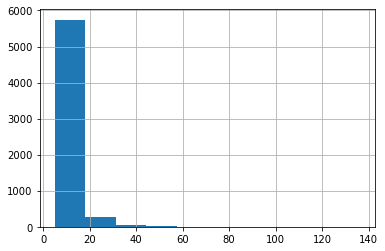

In [995]:
reviewer_df[reviewer_df['count_orders_from_related'] > 0]['order_count'].hist()

In [858]:
6089/39387

0.15459415543199534

In [861]:
related_purchasers = list(reviewer_df[reviewer_df['count_orders_from_related'] > 0]['reviewerID'])

In [865]:
reviews['related_purchase'] = reviews['reviewerID'].apply(lambda x: 1 if x in related_purchasers else 0 )
reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Converted_Date,...,DownVote,Review_len,summary_len,year,month,Sentiment,Polarity,subjectivity,Category_type,related_purchase
0,A2G5TCU2WDFZ65,31887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013",2013-01-19,...,0,306,11,2013,1,positive,0.412222,0.584815,clothing,0
1,A2Q6UWR5PBHTJS,31887,"Sylvia ""Sylvia""","[0, 0]","Our granddaughters are all very girlie, so whe...",5,Sassy!,1358553600,"01 19, 2013",2013-01-19,...,0,233,6,2013,1,positive,0.277500,0.430000,clothing,0
2,AX1QE6IR7CHXM,31887,JJ,"[0, 0]","Wonder my niece wears it every single day, yel...",5,Wonderful and great shipping.,1388620800,"01 2, 2014",2014-01-02,...,0,180,29,2014,1,positive,0.171131,0.541667,clothing,0
3,A1JR9KKF6UKUWW,31887,Queens Meadow,"[0, 0]",Bought this for my niece as part of her fairy ...,5,must have for a fairy princess,1359504000,"01 30, 2013",2013-01-30,...,0,120,30,2013,1,neutral,0.000000,0.000000,clothing,0
4,A2A2WZYLU528RO,31887,Julie Gayler,"[0, 0]",My daughter has worn this skirt almost every d...,5,Excellent quality!,1391040000,"01 30, 2014",2014-01-30,...,0,360,18,2014,1,positive,0.205357,0.566270,clothing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278672,A2DG63DN704LOI,B00KKXCJQU,ESlayd,"[0, 1]",I don't normally go ga-ga over a product very ...,5,These have literally changed the way I travel!,1403568000,"06 24, 2014",2014-06-24,...,1,1315,46,2014,6,positive,0.221280,0.601786,others,1
278673,A1EVV74UQYVKRY,B00KKXCJQU,K. Groh,"[0, 0]",I've been traveling back and forth to England ...,5,Wonderful for Better Packing,1403740800,"06 26, 2014",2014-06-26,...,0,827,28,2014,6,positive,0.286667,0.516667,others,1
278674,A1UQBFCERIP7VJ,B00KKXCJQU,Margaret Picky,"[1, 1]",These are very nice packing cubes and the 18 x...,5,"Convenient, lightweight, and durable",1402185600,"06 8, 2014",2014-06-08,...,0,914,36,2014,6,positive,0.219090,0.553968,others,1
278675,A22CW0ZHY3NJH8,B00KKXCJQU,Noname,"[2, 2]",I am on vacation with my family of four and th...,5,Holds Up Well In Real World Test,1404691200,"07 7, 2014",2014-07-07,...,0,1126,32,2014,7,positive,0.231777,0.425568,others,0


In [873]:
reviews[reviews['reviewerID'].isin(related_purchasers)].groupby('Category_type')['reviewerID'].count().to_frame()

,reviewerID
Category_type,
clothing,23142
jewelry,9381
others,11863
shoes,10204


In [878]:
reviews['asin'].value_counts().describe()

count    23033.000000
mean        12.099032
std         13.968255
min          5.000000
25%          6.000000
50%          8.000000
75%         13.000000
max        441.000000
Name: asin, dtype: float64

In [902]:
top_reviewed = reviews['asin'].value_counts()[:20].to_frame().reset_index() #Most reviewed products
top_reviewed.rename({'asin':'review_counts','index':'asin'}, axis =1, inplace = True)
top_reviewed

,asin,review_counts
0,B005LERHD8,441
1,B005GYGD7O,286
2,B008WYDP1C,249
3,B0058XIMMM,241
4,B00CKGB85I,225
5,B007RD9DS8,217
6,B002RADHJC,211
7,B000T9VK56,207
8,B0000C321X,205
9,B0001ZNZJM,197


In [904]:
top_reviewed = pd.merge(top_reviewed, metadata[['asin','title','Category_type']], on = 'asin', how = 'left')
top_reviewed

,asin,review_counts,title,Category_type
0,B005LERHD8,441,"Vintage, Retro Colorful Crystal Owl Pendant an...",others
1,B005GYGD7O,286,Spalding Women's Capri Legging,clothing
2,B008WYDP1C,249,Allegra K Women's Long Sleeve Skull Printed St...,clothing
3,B0058XIMMM,241,Skechers Women's Go Walk Slip-On,shoes
4,B00CKGB85I,225,Azules Women's Rayon Span Maxi Skirt,clothing
5,B007RD9DS8,217,Retro Peacock Crystal Necklace Pendant Jewelry...,jewelry
6,B002RADHJC,211,Glamorise Women's No-Bounce Full-Support Sport...,clothing
7,B000T9VK56,207,GGI Deluxe 16-piece Watch Repair Tool Kit WTK-16,others
8,B0000C321X,205,Levi's Men's 501 Original Fit Jean,clothing
9,B0001ZNZJM,197,ExOfficio Men's GiveNGo Boxer Brief,clothing


In [905]:
top_reviewed['Category_type'].value_counts()

clothing    11
others       4
shoes        3
jewelry      2
Name: Category_type, dtype: int64